Assignment Outcomes
Participants can understand about machine learning and its applications.
Participants are able to understand the concept of machine learning (supervised and unsupervised) and is able to perform various machine learning models in solving a data science problem. Participants are able to decipher insights and decide the feature importance from models that they created. Participants are able to understand the concept of machine learning (supervised and unsupervised) and is able to perform various machine learning models in solving a data science problem.
Participants are able to boost their model evaluation through hyperparameter tuning & bootstrapping.
Participants are able to use metric evaluation for supervised learning to diagnose supervised learning model performance.
Questions
Berdasarkan dataset yang telah kalian pilih pada Assignment 2:
1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

Assessment Requirement
Peserta dapat memilih model yang akan dijalankan termasuk supervised learning atau unsupervised learning sesuai dataset yang dipilih.
Peserta mampu menyajikan berbagai machine learning model yang dapat dipilih sesuai dengan dataset.
Peserta mampu menjelaskan alasan pemilihan machine learning model tersebut.
Peserta mampu mengeksekusi coding dari setiap tahapan machine learning model secara tepat.
Peserta mampu memahami penerapan cross-validation pada model machine learning yang telah dibuat sebelumnya.
Peserta mampu memahami cara membuat learning curves pada machine learning model yang telah dibuat sebelumnya.
Peserta mampu memahami cara membaca hasil learning curves yang telah dihasilkan dan dapat menginterpretasikan hasilnya.
Peserta mampu menggunakan hyperparameter dan bootstrapping untuk model tersebut, jika ada.
Peserta dapat mengevaluasi hasil dari machine learning model yang dibuat menggunakan metric evaluation yang sesuai.
Peserta dapat memberikan alasan pemilihan metric evaluation yang dipilih sebelumnya.
Peserta dapat menginterpretasikan hasil dari metric evaluation yang dipilih.

Dataset yang digunakan adalah dataset dari kaggle yang dapat diakses dengan link github berikut: https://raw.githubusercontent.com/romanouke/Data-Preprocessing-Dataset-DSAI/main/heart.csv

Saya menggunakan 2 metode supervised learning klasifikasi yaitu RandomForest dan XGBoost. Karena kedua metode ini menggunakan pohon keputusan sebagai classifier yang mana cocok dengan banyak fitur seperti pada dataset ini

Saya membagi analisis ini dengan 2 tahap, pertama tahap general atau umum yang dilakukan menggunakan kedua metode dan tahap kedua adalah melakukan analisis dengan menggunakan feature important dari tiap metode yang feature importantnya lebih dari 0.05

Langkah pertama yang dilakukan adalah melakukan import library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from array import array
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from re import S
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/romanouke/Data-Preprocessing-Dataset-DSAI/main/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Data Preproccesing

Membagi dataset menjadi data train sebanyak 80% dan data test 20%

In [ ]:
total_length = int(len(df)) # must be an int
train_length = int(total_length * 0.8) # total length of train (80% of total), must be an int

# Split the DataFrame using indexing
train = df[:train_length]
test = df[train_length:]

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Mengecek imbalanced data terhadap data target di data train

target
1    427
0    393
Name: count, dtype: int64


<Axes: ylabel='count'>

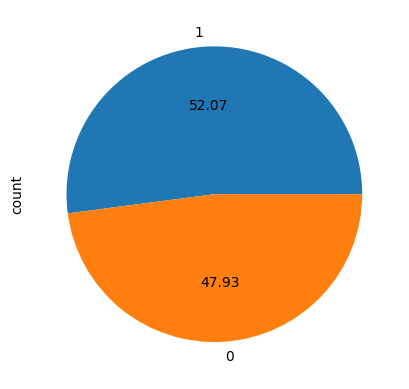

In [ ]:
print(train['target'].value_counts())
train['target'].value_counts().plot.pie(autopct='%.2f')

Mengecek imbalanced data terhadap data target di data test

target
0    106
1     99
Name: count, dtype: int64


<Axes: ylabel='count'>

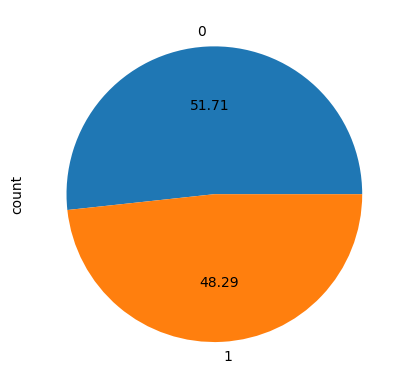

In [ ]:
print(test['target'].value_counts())
test['target'].value_counts().plot.pie(autopct='%.2f')

Melakukan balancing data di data train dan data test menggunakan fungsi SMOTE

In [ ]:
X = train.drop('target', axis=1)
y = train['target']

# Oversample using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
train_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Print balanced dataset
train_balanced.shape

(854, 14)

In [ ]:
X = test.drop('target', axis=1)
y = test['target']

# Oversample using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
test_balanced = pd.concat([X_resampled, y_resampled], axis=1)

test_balanced.shape

(212, 14)

target
0    427
1    427
Name: count, dtype: int64


<Axes: ylabel='count'>

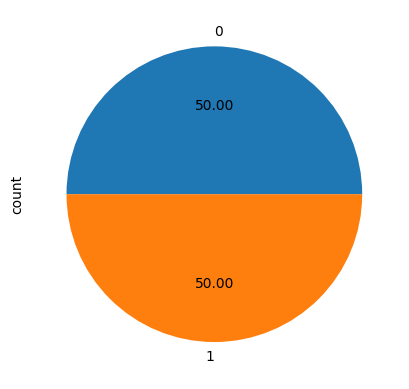

In [ ]:
print(train_balanced['target'].value_counts())
train_balanced['target'].value_counts().plot.pie(autopct='%.2f')

Melakukan standard scaler terhadap data train dan data test

In [ ]:
# Separate features and target variable of Train Balanced Set
X_train = train_balanced.drop('target', axis=1)
y_train = train_balanced['target']

# Separate features and target variable of Test Balanced Set
X_test = test_balanced.drop('target', axis=1)
y_test = test_balanced['target']

# Identify numeric features
numeric_cols = X_train.select_dtypes(exclude='object').columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale only the numeric features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_cols]), columns=numeric_cols)

# Combine scaled features with non-numeric features (if any)
train_scaled = pd.concat([X_train_scaled, X_train.drop(numeric_cols, axis=1)], axis=1)
test_scaled = pd.concat([X_test_scaled, X_test.drop(numeric_cols, axis=1)], axis=1)

# Combine scaled features with the target variable
train_scaled = pd.concat([train_scaled, y_train], axis=1)
test_scaled = pd.concat([test_scaled, y_test], axis=1)

# Print scaled train dataset description
display(train_scaled.describe())
print("")
# Print scaled test dataset description
display(test_scaled.describe())
train_scaled.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,854.000000
mean,8.736181e-17,4.160086e-17,-9.984207e-17,-5.200108e-19,-2.724857e-16,-7.488155e-17,2.080043e-17,-5.075305e-16,-4.368091e-17,-1.081622e-16,3.744078e-17,5.616116e-17,9.568198e-17,0.500000
std,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,0.500293
min,-2.807259e+00,-1.474694e+00,-9.256780e-01,-2.095573e+00,-2.309399e+00,-4.333137e-01,-9.607033e-01,-3.351022e+00,-7.189394e-01,-9.205341e-01,-2.209088e+00,-7.443797e-01,-3.689393e+00,0.000000
25%,-7.209409e-01,-1.474694e+00,-9.256780e-01,-6.526450e-01,-6.797259e-01,-4.333137e-01,-9.607033e-01,-7.151956e-01,-7.189394e-01,-9.205341e-01,-5.993943e-01,-7.443797e-01,-5.003833e-01,0.000000
50%,1.575089e-01,6.781070e-01,6.248326e-02,-9.767254e-02,-9.228544e-02,-4.333137e-01,-9.607033e-01,1.490096e-01,-7.189394e-01,-2.490580e-01,-5.993943e-01,-7.443797e-01,-5.003833e-01,0.500000
75%,7.065401e-01,6.781070e-01,1.050644e+00,4.572999e-01,6.278028e-01,-4.333137e-01,9.517457e-01,7.107431e-01,1.390938e+00,5.902870e-01,1.010300e+00,2.130002e-01,1.094122e+00,1.000000
max,2.463440e+00,6.781070e-01,2.038806e+00,3.787134e+00,5.990565e+00,2.307797e+00,2.864195e+00,2.309523e+00,1.390938e+00,4.283405e+00,1.010300e+00,3.085140e+00,1.094122e+00,1.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,5.446377e-17,-3.351617e-17,2.094760e-17,-7.457347e-16,4.922687e-17,-3.351617e-17,1.173066e-16,-6.284281e-17,1.256856e-16,-8.379042e-17,1.508228e-16,1.675808e-17,2.220446e-16,0.500000
std,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,0.501183
min,-2.218649e+00,-1.689540e+00,-7.983335e-01,-1.936756e+00,-2.336376e+00,-3.572948e-01,-1.172234e+00,-2.375890e+00,-6.871843e-01,-9.554531e-01,-2.217217e+00,-7.247939e-01,-3.981034e+00,0.000000
25%,-7.055097e-01,-1.689540e+00,-7.983335e-01,-6.784286e-01,-7.084702e-01,-3.572948e-01,-1.172234e+00,-8.175283e-01,-6.871843e-01,-9.554531e-01,-6.074567e-01,-7.247939e-01,-6.517275e-01,0.000000
50%,1.092579e-01,5.918771e-01,-7.983335e-01,-4.926472e-02,-1.194255e-01,-3.572948e-01,7.104448e-01,2.177471e-01,-6.871843e-01,-2.502166e-01,-6.074567e-01,-7.247939e-01,-6.517275e-01,0.500000
75%,6.912348e-01,5.918771e-01,1.071796e+00,5.798992e-01,5.552984e-01,-3.572948e-01,7.104448e-01,8.062194e-01,1.455214e+00,6.313290e-01,1.002304e+00,3.134244e-01,1.012926e+00,1.000000
max,2.553561e+00,5.918771e-01,2.006860e+00,3.096555e+00,3.789689e+00,2.798809e+00,2.593124e+00,1.939574e+00,1.455214e+00,3.981202e+00,1.002304e+00,3.428079e+00,1.012926e+00,1.000000


(854, 14)

#Tahap Pertama (Umum)

Melakukan training dan validasi antara data train dan data test menggunakan RandomForestClassifier dan KFoldCrossValidation dan melihat hasil dari model dengan Learning Curve

Cross Validation Score [0.98245614 0.96491228 1.         0.98830409 0.98235294]
Cross Validation Score Mean Accurary 0.9836050911592708


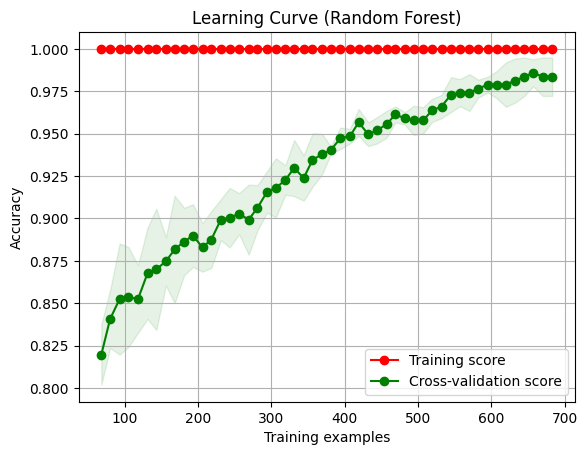

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

# Create an XGBoost classifier with random_state parameters and set it to 42
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]
plt.show()

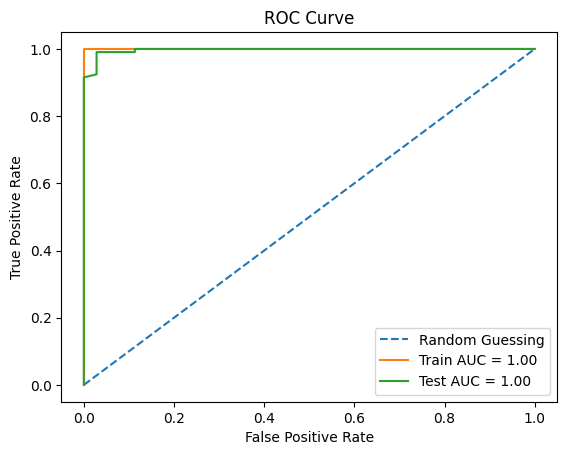

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

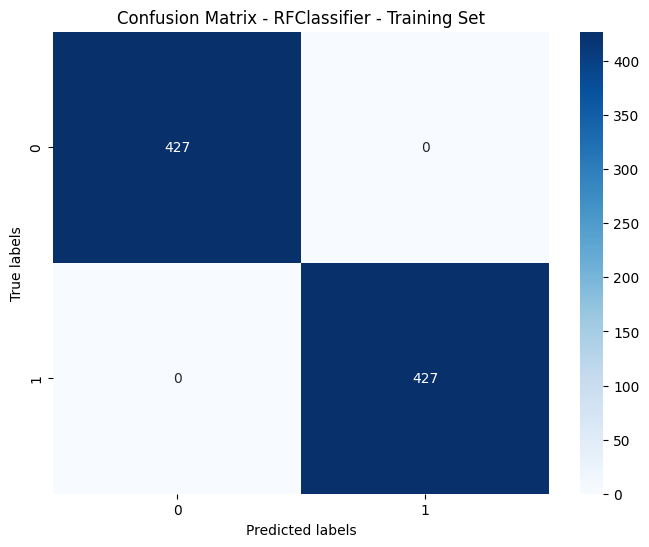

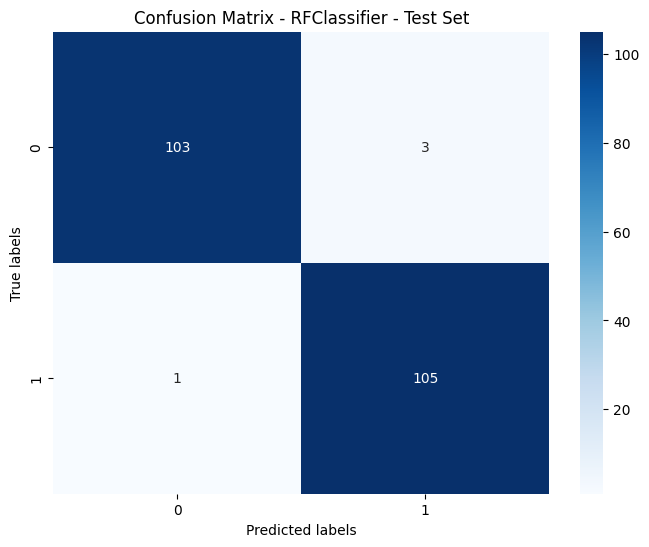

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RFClassifier - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RFClassifier - Test Set')
plt.show()


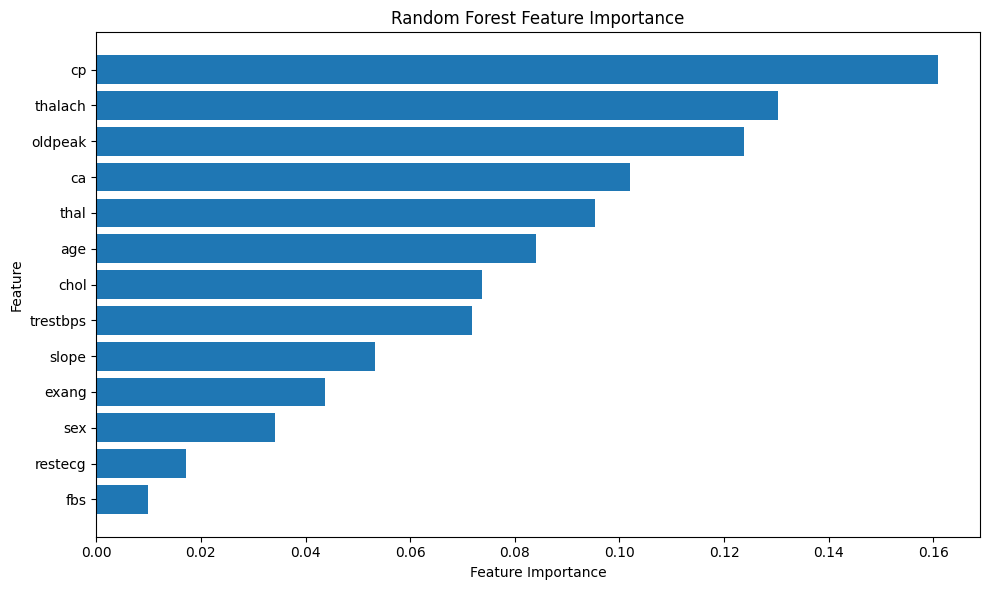

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

Menggunakan hyperparameter tuning (mencari best hyperparameter) pada RandomForestClassifier

In [ ]:
# Define the parameter grid for randomized search
param_grid = {
    'n_estimators': randint(10, 100),        # Number of trees in the forest
    'criterion': ['gini', 'entropy'],          # Function to measure the quality of a split
    'max_depth': [None] + list(randint(1, 100).rvs(10)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),        # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum weighted fraction of the sum total of weights
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'max_leaf_nodes': [None] + list(randint(2, 100).rvs(10)),  # Grow trees with max_leaf_nodes in best-first fashion
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'bootstrap': [True, False],                # Whether bootstrap samples are used when building trees
    'oob_score': [True, False],                # Whether to use out-of-bag samples to estimate the generalization accuracy
    'n_jobs': [-1],                            # Number of jobs to run in parallel
    'random_state': [None],                    # Controls the randomness of the estimator
    'verbose': [0, 1, 2],                      # Controls the verbosity when fitting and predicting
    'warm_start': [True, False],               # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    'class_weight': ['balanced', 'balanced_subsample', None],  # Weights associated with classes
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Complexity parameter used for Minimal Cost-Complexity Pruning
}

model = RandomForestClassifier(n_estimators=100,random_state=42)
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=kfold, random_state=42)
# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_RF = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_RF)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 97building tree 2 of 97

building tree 3 of 97building tree 4 of 97

building tree 5 of 97building tree 6 of 97

building tree 7 of 97
building tree 8 of 97
building tree 9 of 97
building tree 10 of 97building tree 11 of 97

building tree 12 of 97
building tree 13 of 97building tree 14 of 97

building tree 15 of 97
building tree 16 of 97building tree 17 of 97

building tree 18 of 97
building tree 19 of 97
building tree 20 of 97
building tree 21 of 97building tree 22 of 97

building tree 23 of 97building tree 24 of 97

building tree 25 of 97building tree 26 of 97

building tree 27 of 97
building tree 28 of 97
building tree 29 of 97
building tree 30 of 97
building tree 31 of 97
building tree 32 of 97building tree 33 of 97

building tree 34 of 97
building tree 35 of 97building tree 36 of 97

building tree 37 of 97
building tree 38 of 97building tree 39 of 97

building tree 40 of 97
building tree 41 of 97
building tree 42 of 97
building tree 43 of 97building tree 44 of 9

[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  97 out of  97 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 97
building tree 2 of 97
building tree 3 of 97
building tree 4 of 97building tree 5 of 97

building tree 6 of 97
building tree 7 of 97
building tree 8 of 97
building tree 9 of 97
building tree 10 of 97
building tree 11 of 97building tree 12 of 97

building tree 13 of 97building tree 14 of 97

building tree 15 of 97
building tree 16 of 97
building tree 17 of 97building tree 18 of 97

building tree 19 of 97
building tree 20 of 97
building tree 21 of 97building tree 22 of 97

building tree 23 of 97
building tree 24 of 97
building tree 25 of 97
building tree 26 of 97
building tree 27 of 97
building tree 28 of 97building tree 29 of 97

building tree 30 of 97
building tree 31 of 97
building tree 32 of 97building tree 33 of 97

building tree 34 of 97building tree 35 of 97

building tree 36 of 97
building tree 37 of 97building tree 38 of 97
building tree 39 of 97
building tree 40 of 97
building tree 41 of 97
building tree 42 of 97

building tree 43 of 97
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    0.3s finished


building tree 69 of 97building tree 70 of 97

building tree 71 of 97
building tree 72 of 97building tree 73 of 97

building tree 74 of 97
building tree 75 of 97
building tree 76 of 97
building tree 77 of 97
building tree 78 of 97building tree 79 of 97

building tree 80 of 97
building tree 81 of 97
building tree 82 of 97building tree 83 of 97

building tree 84 of 97building tree 85 of 97

building tree 86 of 97building tree 87 of 97

building tree 88 of 97building tree 89 of 97

building tree 90 of 97
building tree 91 of 97
building tree 92 of 97
building tree 93 of 97
building tree 94 of 97
building tree 95 of 97
building tree 96 of 97
building tree 97 of 97


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  97 out of  97 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 97
building tree 2 of 97
building tree 3 of 97
building tree 4 of 97
building tree 5 of 97building tree 6 of 97

building tree 7 of 97
building tree 8 of 97
building tree 9 of 97
building tree 10 of 97
building tree 11 of 97building tree 12 of 97

building tree 13 of 97
building tree 14 of 97
building tree 15 of 97building tree 16 of 97

building tree 17 of 97
building tree 18 of 97building tree 19 of 97

building tree 20 of 97
building tree 21 of 97
building tree 22 of 97building tree 23 of 97

building tree 24 of 97
building tree 25 of 97
building tree 26 of 97
building tree 27 of 97
building tree 28 of 97
building tree 29 of 97
building tree 30 of 97
building tree 31 of 97
building tree 32 of 97building tree 33 of 97

building tree 34 of 97
building tree 35 of 97building tree 36 of 97

building tree 37 of 97
building tree 38 of 97
building tree 39 of 97
building tree 40 of 97
building tree 41 of 97
building tree 42 of 97
building tree 43 of 97
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  97 out of  97 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 97
building tree 2 of 97
building tree 3 of 97
building tree 4 of 97
building tree 5 of 97
building tree 6 of 97
building tree 7 of 97
building tree 8 of 97
building tree 9 of 97building tree 10 of 97

building tree 11 of 97
building tree 12 of 97
building tree 13 of 97
building tree 14 of 97building tree 15 of 97
building tree 16 of 97

building tree 17 of 97
building tree 18 of 97
building tree 19 of 97building tree 20 of 97

building tree 21 of 97
building tree 22 of 97
building tree 23 of 97
building tree 24 of 97
building tree 25 of 97
building tree 26 of 97building tree 27 of 97

building tree 28 of 97building tree 29 of 97

building tree 30 of 97
building tree 31 of 97
building tree 32 of 97
building tree 33 of 97building tree 34 of 97

building tree 35 of 97
building tree 36 of 97
building tree 37 of 97
building tree 38 of 97
building tree 39 of 97
building tree 40 of 97
building tree 41 of 97
building tree 42 of 97
building tree 43 of 97building tree 44 of 9

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    0.3s finished


building tree 63 of 97
building tree 64 of 97
building tree 65 of 97
building tree 66 of 97
building tree 67 of 97
building tree 68 of 97building tree 69 of 97

building tree 70 of 97
building tree 71 of 97
building tree 72 of 97building tree 73 of 97

building tree 74 of 97building tree 75 of 97

building tree 76 of 97
building tree 77 of 97
building tree 78 of 97building tree 79 of 97

building tree 80 of 97
building tree 81 of 97
building tree 82 of 97building tree 83 of 97

building tree 84 of 97
building tree 85 of 97
building tree 86 of 97
building tree 87 of 97
building tree 88 of 97building tree 89 of 97

building tree 90 of 97building tree 91 of 97
building tree 92 of 97

building tree 93 of 97building tree 94 of 97

building tree 95 of 97building tree 96 of 97

building tree 97 of 97


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  97 out of  97 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 97
building tree 2 of 97
building tree 3 of 97
building tree 4 of 97
building tree 5 of 97
building tree 6 of 97building tree 7 of 97

building tree 8 of 97
building tree 9 of 97
building tree 10 of 97
building tree 11 of 97
building tree 12 of 97
building tree 13 of 97
building tree 14 of 97
building tree 15 of 97
building tree 16 of 97
building tree 17 of 97
building tree 18 of 97
building tree 19 of 97
building tree 20 of 97
building tree 21 of 97
building tree 22 of 97building tree 23 of 97

building tree 24 of 97building tree 25 of 97

building tree 26 of 97
building tree 27 of 97
building tree 28 of 97
building tree 29 of 97
building tree 30 of 97
building tree 31 of 97
building tree 32 of 97
building tree 33 of 97
building tree 34 of 97
building tree 35 of 97
building tree 36 of 97building tree 37 of 97

building tree 38 of 97building tree 39 of 97

building tree 40 of 97
building tree 41 of 97
building tree 42 of 97
building tree 43 of 97
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  97 out of  97 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 58
building tree 2 of 58
building tree 3 of 58building tree 4 of 58

building tree 5 of 58building tree 6 of 58

building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58building tree 14 of 58
building tree 15 of 58

building tree 16 of 58
building tree 17 of 58building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58

building tree 22 of 58
building tree 23 of 58building tree 24 of 58

building tree 25 of 58
building tree 26 of 58building tree 27 of 58
building tree 28 of 58
building tree 29 of 58

building tree 30 of 58building tree 31 of 58

building tree 32 of 58building tree 33 of 58

building tree 34 of 58building tree 35 of 58

building tree 36 of 58building tree 37 of 58



[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  58 out of  58 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


building tree 38 of 58building tree 39 of 58

building tree 40 of 58building tree 41 of 58
building tree 42 of 58
building tree 43 of 58

building tree 44 of 58building tree 45 of 58

building tree 46 of 58building tree 47 of 58

building tree 48 of 58building tree 49 of 58

building tree 50 of 58building tree 51 of 58

building tree 52 of 58building tree 53 of 58

building tree 54 of 58building tree 55 of 58

building tree 56 of 58building tree 57 of 58

building tree 58 of 58


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 58
building tree 2 of 58
building tree 3 of 58
building tree 4 of 58building tree 5 of 58

building tree 6 of 58building tree 7 of 58

building tree 8 of 58building tree 9 of 58

building tree 10 of 58
building tree 11 of 58
building tree 12 of 58building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58

building tree 17 of 58building tree 18 of 58

building tree 19 of 58
building tree 20 of 58
building tree 21 of 58building tree 22 of 58
building tree 23 of 58
building tree 24 of 58

building tree 25 of 58building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58

building tree 31 of 58building tree 32 of 58

building tree 33 of 58building tree 34 of 58

building tree 35 of 58building tree 36 of 58

building tree 37 of 58building tree 38 of 58

building tree 39 of 58building tree 40 of 58

building tree 41 of 58
building tree 42 of 58
building tree 43 of 58building tree 44 of 5

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  58 out of  58 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 58
building tree 2 of 58
building tree 3 of 58
building tree 4 of 58
building tree 5 of 58
building tree 6 of 58building tree 7 of 58
building tree 8 of 58

building tree 9 of 58
building tree 10 of 58building tree 11 of 58

building tree 12 of 58building tree 13 of 58

building tree 14 of 58building tree 15 of 58

building tree 16 of 58building tree 17 of 58

building tree 18 of 58building tree 19 of 58

building tree 20 of 58building tree 21 of 58

building tree 22 of 58building tree 23 of 58

building tree 24 of 58building tree 25 of 58

building tree 26 of 58building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58

building tree 31 of 58building tree 32 of 58
building tree 33 of 58
building tree 34 of 58

building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58building tree 39 of 58

building tree 40 of 58building tree 41 of 58


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  58 out of  58 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(



building tree 42 of 58building tree 43 of 58

building tree 44 of 58building tree 45 of 58
building tree 46 of 58
building tree 47 of 58
building tree 48 of 58
building tree 49 of 58

building tree 50 of 58building tree 51 of 58

building tree 52 of 58building tree 53 of 58
building tree 54 of 58
building tree 55 of 58
building tree 56 of 58
building tree 57 of 58
building tree 58 of 58



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 58
building tree 2 of 58
building tree 3 of 58
building tree 4 of 58
building tree 5 of 58building tree 6 of 58

building tree 7 of 58building tree 8 of 58

building tree 9 of 58building tree 10 of 58

building tree 11 of 58
building tree 12 of 58building tree 13 of 58

building tree 14 of 58building tree 15 of 58
building tree 16 of 58

building tree 17 of 58building tree 18 of 58

building tree 19 of 58building tree 20 of 58
building tree 21 of 58

building tree 22 of 58building tree 23 of 58

building tree 24 of 58building tree 25 of 58

building tree 26 of 58building tree 27 of 58

building tree 28 of 58
building tree 29 of 58building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58

building tree 36 of 58
building tree 37 of 58building tree 38 of 58

building tree 39 of 58building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 5

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  58 out of  58 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 58building tree 2 of 58
building tree 3 of 58

building tree 4 of 58building tree 5 of 58

building tree 6 of 58building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58

building tree 17 of 58building tree 18 of 58
building tree 19 of 58
building tree 20 of 58

building tree 21 of 58building tree 22 of 58

building tree 23 of 58
building tree 24 of 58building tree 25 of 58

building tree 26 of 58
building tree 27 of 58building tree 28 of 58

building tree 29 of 58building tree 30 of 58
building tree 31 of 58

building tree 32 of 58building tree 33 of 58

building tree 34 of 58building tree 35 of 58

building tree 36 of 58
building tree 37 of 58building tree 38 of 58
building tree 39 of 58


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  58 out of  58 | elapsed:    0.0s finished



building tree 40 of 58
building tree 41 of 58
building tree 42 of 58building tree 43 of 58
building tree 44 of 58
building tree 45 of 58

building tree 46 of 58building tree 47 of 58

building tree 48 of 58building tree 49 of 58
building tree 50 of 58

building tree 51 of 58
building tree 52 of 58building tree 53 of 58

building tree 54 of 58building tree 55 of 58
building tree 56 of 58
building tree 57 of 58
building tree 58 of 58



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90building tree 6 of 90

building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90building tree 11 of 90

building tree 12 of 90building tree 13 of 90

building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90building tree 21 of 90

building tree 22 of 90building tree 23 of 90

building tree 24 of 90
building tree 25 of 90
building tree 26 of 90building tree 27 of 90

building tree 28 of 90building tree 29 of 90

building tree 30 of 90
building tree 31 of 90
building tree 32 of 90building tree 33 of 90

building tree 34 of 90building tree 35 of 90

building tree 36 of 90building tree 37 of 90

building tree 38 of 90building tree 39 of 90

building tree 40 of 90building tree 41 of 90

building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Pa

building tree 1 of 90building tree 2 of 90

building tree 3 of 90building tree 4 of 90

building tree 5 of 90building tree 6 of 90

building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90building tree 16 of 90

building tree 17 of 90
building tree 18 of 90building tree 19 of 90

building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90building tree 30 of 90

building tree 31 of 90building tree 32 of 90
building tree 33 of 90
building tree 34 of 90

building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90building tree 39 of 90

building tree 40 of 90
building tree 41 of 90building tree 42 of 90

building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90building tree 2 of 90

building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90building tree 13 of 90

building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90building tree 23 of 90

building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90building tree 35 of 90

building tree 36 of 90building tree 37 of 90

building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90building tree 2 of 90

building tree 3 of 90building tree 4 of 90

building tree 5 of 90
building tree 6 of 90
building tree 7 of 90building tree 8 of 90

building tree 9 of 90
building tree 10 of 90
building tree 11 of 90building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90

building tree 19 of 90
building tree 20 of 90
building tree 21 of 90building tree 22 of 90

building tree 23 of 90building tree 24 of 90

building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90building tree 34 of 90

building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90building tree 2 of 90

building tree 3 of 90building tree 4 of 90

building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90building tree 9 of 90

building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90building tree 17 of 90

building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90building tree 25 of 90

building tree 26 of 90
building tree 27 of 90
building tree 28 of 90building tree 29 of 90

building tree 30 of 90
building tree 31 of 90building tree 32 of 90

building tree 33 of 90building tree 34 of 90

building tree 35 of 90
building tree 36 of 90
building tree 37 of 90building tree 38 of 90

building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90building tree 43 of 90

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 43
building tree 2 of 43
building tree 3 of 43building tree 4 of 43

building tree 5 of 43building tree 6 of 43

building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43
building tree 13 of 43
building tree 14 of 43building tree 15 of 43

building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43building tree 33 of 43

building tree 34 of 43building tree 35 of 43

building tree 36 of 43building tree 37 of 43

building tree 38 of 43building tree 39 of 43

building tree 40 of 43
building tree 41 of 43
building tree 42 of 43building tree 43 of 43



[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 43
building tree 2 of 43
building tree 3 of 43building tree 4 of 43

building tree 5 of 43
building tree 6 of 43
building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43
building tree 13 of 43
building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43building tree 25 of 43

building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43
building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43building tree 38 of 43

building tree 39 of 43
building tree 40 of 43
building tree 41 of 43
building tree 42 of 43
building tree 43 of 43
building tree 1 of 4

[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.

building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43
building tree 13 of 43
building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43building tree 25 of 43

building tree 26 of 43
building tree 27 of 43building tree 28 of 43
building tree 29 of 43

building tree 30 of 43building tree 31 of 43

building tree 32 of 43building tree 33 of 43

building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43
building tree 38 of 43
building tree 39 of 43
building tree 40 of 43
building tree 41 of 43
building tree 42 of 43
building tree 43 of 43
building tree 1 of 43
building tree 2 of 43
building tree 3 of 43
building tree 4 of 43
building tree 5 of 43
building tree 6 of 43
building tree 7 of 4

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2

building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43building tree 13 of 43

building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43
building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43
building tree 38 of 43
building tree 39 of 43
building tree 40 of 43
building tree 41 of 43
building tree 42 of 43
building tree 43 of 43
building tree 1 of 43building tree 2 of 43

building tree 3 of 43building tree 4 of 43

building tree 5 of 43building tree 6 of 43

building tree 7 of 43
building tree 8 of 4

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.0s finished


building tree 12 of 43
building tree 13 of 43
building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43building tree 34 of 43

building tree 35 of 43
building tree 36 of 43building tree 37 of 43

building tree 38 of 43building tree 39 of 43

building tree 40 of 43
building tree 41 of 43
building tree 42 of 43building tree 43 of 43

building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56building tree 32 of 56

building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56building tree 40 of 56

building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 56
building tree 45 of 56
building tree 46 of 56
building tree 47 of 56
building tree 48 of 56
building tree 49 of 56
building tree 50 of 56
building tree 51 of 56
building tree 52 of 56
building tree 53 of 56
building tree 54 of 56building tree 55 of 56

building tree 56 of 56
building tr

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 36 of 56building tree 37 of 56

building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 56
building tree 45 of 56
building tree 46 of 56
building tree 47 of 56
building tree 48 of 56
building tree 49 of 56
building tree 50 of 56
building tree 51 of 56
building tree 52 of 56
building tree 53 of 56building tree 54 of 56

building tree 55 of 56building tree 56 of 56

building tree 1 of 56building tree 2 of 56

building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56building tree 9 of 56

building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56building tree 15 of 56

building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 

[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


building tree 43 of 56building tree 44 of 56

building tree 45 of 56building tree 46 of 56

building tree 47 of 56
building tree 48 of 56
building tree 49 of 56
building tree 50 of 56
building tree 51 of 56
building tree 52 of 56
building tree 53 of 56
building tree 54 of 56
building tree 55 of 56
building tree 56 of 56
building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56building tree 8 of 56

building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56building tree 20 of 56

building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 

[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished


building tree 51 of 56building tree 52 of 56

building tree 53 of 56
building tree 54 of 56
building tree 55 of 56
building tree 56 of 56
building tree 1 of 72
building tree 2 of 72building tree 3 of 72

building tree 4 of 72building tree 5 of 72

building tree 6 of 72building tree 7 of 72

building tree 8 of 72
building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72building tree 15 of 72

building tree 16 of 72
building tree 17 of 72
building tree 18 of 72
building tree 19 of 72
building tree 20 of 72
building tree 21 of 72
building tree 22 of 72building tree 23 of 72

building tree 24 of 72
building tree 25 of 72
building tree 26 of 72
building tree 27 of 72building tree 28 of 72

building tree 29 of 72building tree 30 of 72
building tree 31 of 72

building tree 32 of 72
building tree 33 of 72
building tree 34 of 72
building tree 35 of 72
building tree 36 of 72
building tree 37 of 72
building tree 38 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s



building tree 44 of 72
building tree 45 of 72
building tree 46 of 72
building tree 47 of 72
building tree 48 of 72
building tree 49 of 72
building tree 50 of 72building tree 51 of 72

building tree 52 of 72
building tree 53 of 72
building tree 54 of 72
building tree 55 of 72
building tree 56 of 72
building tree 57 of 72
building tree 58 of 72
building tree 59 of 72
building tree 60 of 72
building tree 61 of 72
building tree 62 of 72
building tree 63 of 72
building tree 64 of 72
building tree 65 of 72
building tree 66 of 72
building tree 67 of 72
building tree 68 of 72
building tree 69 of 72building tree 70 of 72
building tree 71 of 72
building tree 72 of 72

building tree 1 of 72building tree 2 of 72

building tree 3 of 72building tree 4 of 72

building tree 5 of 72building tree 6 of 72

building tree 7 of 72building tree 8 of 72

building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 20 of 72
building tree 21 of 72
building tree 22 of 72
building tree 23 of 72building tree 24 of 72

building tree 25 of 72
building tree 26 of 72
building tree 27 of 72building tree 28 of 72

building tree 29 of 72building tree 30 of 72

building tree 31 of 72building tree 32 of 72

building tree 33 of 72
building tree 34 of 72building tree 35 of 72

building tree 36 of 72
building tree 37 of 72building tree 38 of 72

building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72building tree 44 of 72

building tree 45 of 72
building tree 46 of 72
building tree 47 of 72building tree 48 of 72

building tree 49 of 72
building tree 50 of 72
building tree 51 of 72building tree 52 of 72

building tree 53 of 72
building tree 54 of 72
building tree 55 of 72building tree 56 of 72

building tree 57 of 72
building tree 58 of 72
building tree 59 of 72
building tree 60 of 72building tree 61 of 72

building tree 62 of 72
building tr

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 72building tree 2 of 72

building tree 3 of 72
building tree 4 of 72
building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72building tree 9 of 72
building tree 10 of 72
building tree 11 of 72

building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72
building tree 16 of 72building tree 17 of 72

building tree 18 of 72building tree 19 of 72

building tree 20 of 72
building tree 21 of 72
building tree 22 of 72building tree 23 of 72

building tree 24 of 72
building tree 25 of 72building tree 26 of 72

building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72building tree 31 of 72

building tree 32 of 72building tree 33 of 72

building tree 34 of 72
building tree 35 of 72
building tree 36 of 72
building tree 37 of 72
building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 50 of 72
building tree 51 of 72
building tree 52 of 72
building tree 53 of 72
building tree 54 of 72
building tree 55 of 72
building tree 56 of 72building tree 57 of 72

building tree 58 of 72
building tree 59 of 72
building tree 60 of 72
building tree 61 of 72
building tree 62 of 72
building tree 63 of 72
building tree 64 of 72
building tree 65 of 72
building tree 66 of 72
building tree 67 of 72
building tree 68 of 72
building tree 69 of 72
building tree 70 of 72
building tree 71 of 72
building tree 72 of 72
building tree 1 of 72building tree 2 of 72

building tree 3 of 72
building tree 4 of 72
building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72building tree 9 of 72

building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72building tree 16 of 72

building tree 17 of 72
building tree 18 of 72
building tree 19 of 72building tree 20 of 72



[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 21 of 72
building tree 22 of 72
building tree 23 of 72building tree 24 of 72

building tree 25 of 72
building tree 26 of 72
building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72
building tree 31 of 72building tree 32 of 72

building tree 33 of 72
building tree 34 of 72building tree 35 of 72

building tree 36 of 72building tree 37 of 72

building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 72
building tree 45 of 72
building tree 46 of 72
building tree 47 of 72
building tree 48 of 72
building tree 49 of 72
building tree 50 of 72
building tree 51 of 72
building tree 52 of 72
building tree 53 of 72building tree 54 of 72

building tree 55 of 72
building tree 56 of 72
building tree 57 of 72
building tree 58 of 72building tree 59 of 72

building tree 60 of 72
building tree 61 of 72
building tree 62 of 72
building tree 63 of 72building tre

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  1

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10building tree 10 of 10

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60building tree 13 of 60

building tree 14 of 60
building tree 15 of 60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


building tree 16 of 60building tree 17 of 60

building tree 18 of 60building tree 19 of 60

building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60building tree 37 of 60

building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60building tree 56 of 60

building tree 57 of 60
building tree 58 of 60
building tr

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60building tree 14 of 60

building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60building tree 24 of 60
building tree 25 of 60
building tree 26 of 60

building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60building tree 32 of 60

building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60building tree 42 of 60

building tree 43 of 60building tree 44 of 6

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60building tree 14 of 60

building tree 15 of 60
building tree 16 of 60
building tree 17 of 60building tree 18 of 60

building tree 19 of 60
building tree 20 of 60
building tree 21 of 60building tree 22 of 60

building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60building tree 27 of 60

building tree 28 of 60building tree 29 of 60

building tree 30 of 60building tree 31 of 60

building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60building tree 38 of 60

building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60building tree 9 of 60

building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60building tree 16 of 60

building tree 17 of 60building tree 18 of 60

building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60building tree 30 of 60

building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60building tree 43 of 60

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 60building tree 2 of 60

building tree 3 of 60
building tree 4 of 60
building tree 5 of 60building tree 6 of 60

building tree 7 of 60building tree 8 of 60

building tree 9 of 60building tree 10 of 60

building tree 11 of 60
building tree 12 of 60
building tree 13 of 60building tree 14 of 60

building tree 15 of 60
building tree 16 of 60building tree 17 of 60

building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60building tree 39 of 60

building tree 40 of 60building tree 41 of 60

building tree 42 of 60building tree 43 of 60
building tree 44 of 6

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differ

building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95building tree 10 of 95

building tree 11 of 95
building tree 12 of 95
building tree 13 of 95building tree 14 of 95

building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95
building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95
building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95building tree 43 of 95

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished


building tree 79 of 95
building tree 80 of 95building tree 81 of 95

building tree 82 of 95
building tree 83 of 95
building tree 84 of 95building tree 85 of 95

building tree 86 of 95
building tree 87 of 95
building tree 88 of 95
building tree 89 of 95
building tree 90 of 95
building tree 91 of 95building tree 92 of 95

building tree 93 of 95
building tree 94 of 95building tree 95 of 95

building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95building tree 6 of 95



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95building tree 25 of 95

building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95
building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95
building tree 43 of 95building tree 44 of 95
building tree 45 of 95

building tree 46 of 95building tree 47 of 95
building tree 48 of 95
building tree 49 of 95

building tree 

[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 95building tree 2 of 95
building tree 3 of 95
building tree 4 of 95

building tree 5 of 95building tree 6 of 95

building tree 7 of 95
building tree 8 of 95
building tree 9 of 95building tree 10 of 95
building tree 11 of 95
building tree 12 of 95

building tree 13 of 95building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95

building tree 23 of 95building tree 24 of 95

building tree 25 of 95building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95

building tree 31 of 95building tree 32 of 95
building tree 33 of 95
building tree 34 of 95

building tree 35 of 95building tree 36 of 95
building tree 37 of 95
building tree 38 of 95

building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95
building tree 43 of 95
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished



building tree 71 of 95building tree 72 of 95

building tree 73 of 95
building tree 74 of 95building tree 75 of 95

building tree 76 of 95building tree 77 of 95
building tree 78 of 95
building tree 79 of 95

building tree 80 of 95building tree 81 of 95
building tree 82 of 95
building tree 83 of 95

building tree 84 of 95building tree 85 of 95
building tree 86 of 95
building tree 87 of 95

building tree 88 of 95building tree 89 of 95
building tree 90 of 95
building tree 91 of 95

building tree 92 of 95building tree 93 of 95
building tree 94 of 95
building tree 95 of 95



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 95building tree 2 of 95
building tree 3 of 95
building tree 4 of 95

building tree 5 of 95building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95

building tree 15 of 95building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95

building tree 26 of 95building tree 27 of 95
building tree 28 of 95
building tree 29 of 95

building tree 30 of 95building tree 31 of 95

building tree 32 of 95building tree 33 of 95
building tree 34 of 95

building tree 35 of 95
building tree 36 of 95building tree 37 of 95
building tree 38 of 95
building tree 39 of 95

building tree 40 of 95building tree 41 of 95
building tree 42 of 95

building tree 43 of 95building tree 44 of 9

[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95building tree 9 of 95
building tree 10 of 95

building tree 11 of 95building tree 12 of 95

building tree 13 of 95building tree 14 of 95

building tree 15 of 95building tree 16 of 95

building tree 17 of 95building tree 18 of 95

building tree 19 of 95building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95

building tree 26 of 95building tree 27 of 95

building tree 28 of 95building tree 29 of 95

building tree 30 of 95building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95
building tree 43 of 95

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished



building tree 73 of 95

building tree 74 of 95building tree 75 of 95
building tree 76 of 95
building tree 77 of 95

building tree 78 of 95building tree 79 of 95
building tree 80 of 95
building tree 81 of 95

building tree 82 of 95building tree 83 of 95
building tree 84 of 95
building tree 85 of 95

building tree 86 of 95building tree 87 of 95
building tree 88 of 95
building tree 89 of 95

building tree 90 of 95building tree 91 of 95
building tree 92 of 95
building tree 93 of 95
building tree 94 of 95
building tree 95 of 95



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29
building tree 10 of 29
building tree 11 of 29building tree 12 of 29
building tree 13 of 29
building tree 14 of 29

building tree 15 of 29building tree 16 of 29
building tree 17 of 29
building tree 18 of 29
building tree 19 of 29
building tree 20 of 29
building tree 21 of 29
building tree 22 of 29
building tree 23 of 29
building tree 24 of 29
building tree 25 of 29
building tree 26 of 29
building tree 27 of 29
building tree 28 of 29
building tree 29 of 29

building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29building tree 9 of 29
building tree 10 of 29

building tree 11 of 29
building tree 12 of 29
building tree 13 of 29building tree 14 of 29
building tree 15 of 29
buildin

[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29building tree 10 of 29
building tree 11 of 29
building tree 12 of 29
building tree 13 of 29
building tree 14 of 29
building tree 15 of 29
building tree 16 of 29

building tree 17 of 29building tree 18 of 29
building tree 19 of 29
building tree 20 of 29
building tree 21 of 29
building tree 22 of 29
building tree 23 of 29
building tree 24 of 29
building tree 25 of 29
building tree 26 of 29

building tree 27 of 29building tree 28 of 29
building tree 29 of 29

building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29
building tree 10 of 29
building tree 11 of 29
building tree 12 of 29building tree 13 of 29

building tree 14 of 29building tree 15 of 29

buildi

[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29building tree 7 of 29
building tree 8 of 29

building tree 9 of 29building tree 10 of 29
building tree 11 of 29
building tree 12 of 29
building tree 13 of 29
building tree 14 of 29
building tree 15 of 29
building tree 16 of 29
building tree 17 of 29

building tree 18 of 29building tree 19 of 29
building tree 20 of 29
building tree 21 of 29
building tree 22 of 29

building tree 23 of 29building tree 24 of 29
building tree 25 of 29
building tree 26 of 29
building tree 27 of 29
building tree 28 of 29
building tree 29 of 29



[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecat

building tree 1 of 28
building tree 2 of 28
building tree 3 of 28
building tree 4 of 28
building tree 5 of 28
building tree 6 of 28
building tree 7 of 28building tree 8 of 28
building tree 9 of 28
building tree 10 of 28

building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28
building tree 20 of 28
building tree 21 of 28building tree 22 of 28

building tree 23 of 28
building tree 24 of 28
building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28
building tree 1 of 28building tree 2 of 28

building tree 3 of 28building tree 4 of 28

building tree 5 of 28
building tree 6 of 28building tree 7 of 28

building tree 8 of 28building tree 9 of 28

building tree 10 of 28
building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
buildi

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28
building tree 1 of 28
building tree 2 of 28
building tree 3 of 28building tree 4 of 28

building tree 5 of 28building tree 6 of 28

building tree 7 of 28building tree 8 of 28

building tree 9 of 28
building tree 10 of 28
building tree 11 of 28building tree 12 of 28

building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28building tree 20 of 28

building tree 21 of 28building tree 22 of 28

building tree 23 of 28building tree 24 of 28

building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28
building tree 1 of 28building tree 2 of 28

building tree 3 of 28building tree 4 of 28

building tree 5 of 28building tree 6 of 28

building tree 7 of 28
building tree 8 of 28
building tree 9 of 28building tree 10 of 28



[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28
building tree 20 of 28
building tree 21 of 28
building tree 22 of 28building tree 23 of 28

building tree 24 of 28
building tree 25 of 28building tree 26 of 28

building tree 27 of 28
building tree 28 of 28
building tree 1 of 28building tree 2 of 28

building tree 3 of 28
building tree 4 of 28
building tree 5 of 28building tree 6 of 28

building tree 7 of 28
building tree 8 of 28
building tree 9 of 28building tree 10 of 28

building tree 11 of 28building tree 12 of 28

building tree 13 of 28
building tree 14 of 28building tree 15 of 28

building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28building tree 20 of 28

building tree 21 of 28building tree 22 of 28

building tree 23 of 28
building tree 24 of 28
building tree 25 of 28
building tree 26 of 

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, 

building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60building tree 10 of 60

building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60building tree 26 of 60

building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60

building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60building tree 34 of 60

building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60building tree 39 of 60

building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60building tree 2 of 60

building tree 3 of 60building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60building tree 11 of 60

building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60building tree 24 of 60

building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60building tree 29 of 60

building tree 30 of 60
building tree 31 of 60
building tree 32 of 60building tree 33 of 60

building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60building tree 22 of 60

building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60building tree 8 of 60
building tree 9 of 60

building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60building tree 15 of 60

building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60building tree 27 of 60

building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

building tree 1 of 33building tree 2 of 33
building tree 3 of 33

building tree 4 of 33
building tree 5 of 33
building tree 6 of 33building tree 7 of 33

building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33building tree 13 of 33

building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33building tree 20 of 33

building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33
building tree 1 of 33building tree 2 of 33

building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
buildi

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecat

building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33building tree 9 of 33
building tree 10 of 33

building tree 11 of 33
building tree 12 of 33
building tree 13 of 33building tree 14 of 33

building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33building tree 22 of 33

building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33
building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33building tree 6 of 33

building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
buil

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33
building tree 1 of 52building tree 2 of 52
building tree 3 of 52
building tree 4 of 52

building tree 5 of 52
building tree 6 of 52
building tree 7 of 52building tree 8 of 52

building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52building tree 13 of 52

building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52building tree 24 of 52

building tree 25 of 52building tree 26 of 52

building tree 27 of 52building tree 28 of 52

building tree 29 of 52building tree 30 of 52

building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52building tree 36 of 52

building tree 37 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 45 of 52
building tree 46 of 52
building tree 47 of 52
building tree 48 of 52
building tree 49 of 52
building tree 50 of 52
building tree 51 of 52
building tree 52 of 52
building tree 1 of 52building tree 2 of 52

building tree 3 of 52
building tree 4 of 52
building tree 5 of 52building tree 6 of 52

building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52building tree 25 of 52
building tree 26 of 52

building tree 27 of 52
building tree 28 of 52building tree 29 of 52

building tree 30 of 52building tree 31 of 52

building tree 32 of 52building tree 33 of 52

building tree 34 of 52
building tree 35 of 52
building tree 36 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 41 of 52
building tree 42 of 52
building tree 43 of 52building tree 44 of 52
building tree 45 of 52

building tree 46 of 52
building tree 47 of 52building tree 48 of 52

building tree 49 of 52building tree 50 of 52

building tree 51 of 52building tree 52 of 52

building tree 1 of 52building tree 2 of 52

building tree 3 of 52building tree 4 of 52

building tree 5 of 52
building tree 6 of 52
building tree 7 of 52building tree 8 of 52

building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52building tree 14 of 52

building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52building tree 21 of 52

building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52building tree 29 of 52

building tree 30 of 52
building tree 31 of 52
building tree 32 of 

[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 44 of 52building tree 45 of 52

building tree 46 of 52building tree 47 of 52

building tree 48 of 52building tree 49 of 52

building tree 50 of 52
building tree 51 of 52
building tree 52 of 52
building tree 1 of 52
building tree 2 of 52
building tree 3 of 52building tree 4 of 52

building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52building tree 9 of 52

building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52building tree 17 of 52

building tree 18 of 52building tree 19 of 52

building tree 20 of 52building tree 21 of 52

building tree 22 of 52building tree 23 of 52

building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52building tree 28 of 52

building tree 29 of 52building tree 30 of 52

building tree 31 of 52building tree 32 of 52

building tree 33 of 52
building tree 34 of 52building tree 35 of 5

[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished


building tree 47 of 52
building tree 48 of 52building tree 49 of 52

building tree 50 of 52building tree 51 of 52

building tree 52 of 52


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel

building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51building tree 12 of 51

building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51building tree 20 of 51

building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51building tree 27 of 51

building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51building tree 37 of 51

building tree 38 of 51
building tree 39 of 51
building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 25 of 51
building tree 26 of 51

building tree 27 of 51building tree 28 of 51
building tree 29 of 51

building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51building tree 35 of 51

building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51building tree 40 of 51

building tree 41 of 51building tree 42 of 51

building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51building tree 47 of 51

building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51
building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of

[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s



building tree 41 of 51building tree 42 of 51
building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51

building tree 47 of 51
building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51
building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51building tree 20 of 51

building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51building tree 32 of 51

building tree 33 of

[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_

building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56building tree 27 of 56

building tree 28 of 56
building tree 29 of 56
building tree 30 of 56building tree 31 of 56

building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished


building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56building tree 16 of 56

building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56
building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 56building tree 2 of 56

building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56building tree 27 of 56

building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56
building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 56
building tree 2 of 56
building tree 3 of 56building tree 4 of 56

building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56building tree 10 of 56

building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56building tree 21 of 56

building tree 22 of 56
building tree 23 of 56building tree 24 of 56

building tree 25 of 56building tree 26 of 56

building tree 27 of 56
building tree 28 of 56building tree 29 of 56

building tree 30 of 56building tree 31 of 56

building tree 32 of 56
building tree 33 of 56
building tree 34 of 56building tree 35 of 56

building tree 36 of 56building tree 37 of 56

building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56building tree 44 of 5

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 56building tree 2 of 56

building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56building tree 11 of 56

building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56
building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  56 out of  56 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample

building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25building tree 7 of 25

building tree 8 of 25
building tree 9 of 25
building tree 10 of 25building tree 11 of 25

building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25building tree 16 of 25

building tree 17 of 25building tree 18 of 25

building tree 19 of 25
buildi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25building tree 8 of 25

building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25building tree 14 of 25

building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25building tree 20 of 25

building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25building tree 10 of 25

building tree 11 of 25building tree 12 of 25

building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25buildin

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 25building tree 2 of 25

building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25building tree 25 of 25



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parall

building tree 1 of 91
building tree 2 of 91
building tree 3 of 91
building tree 4 of 91
building tree 5 of 91
building tree 6 of 91
building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 11 of 91
building tree 12 of 91
building tree 13 of 91
building tree 14 of 91
building tree 15 of 91
building tree 16 of 91
building tree 17 of 91
building tree 18 of 91
building tree 19 of 91
building tree 20 of 91
building tree 21 of 91
building tree 22 of 91
building tree 23 of 91
building tree 24 of 91
building tree 25 of 91
building tree 26 of 91
building tree 27 of 91
building tree 28 of 91
building tree 29 of 91
building tree 30 of 91
building tree 31 of 91
building tree 32 of 91
building tree 33 of 91
building tree 34 of 91
building tree 35 of 91
building tree 36 of 91
building tree 37 of 91
building tree 38 of 91
building tree 39 of 91
building tree 40 of 91
building tree 41 of 91
building tree 42 of 91building tree 43 of 91

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  91 out of  91 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 91building tree 2 of 91

building tree 3 of 91building tree 4 of 91

building tree 5 of 91building tree 6 of 91

building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 11 of 91
building tree 12 of 91building tree 13 of 91

building tree 14 of 91
building tree 15 of 91building tree 16 of 91

building tree 17 of 91building tree 18 of 91

building tree 19 of 91building tree 20 of 91

building tree 21 of 91building tree 22 of 91

building tree 23 of 91
building tree 24 of 91
building tree 25 of 91
building tree 26 of 91
building tree 27 of 91
building tree 28 of 91
building tree 29 of 91
building tree 30 of 91
building tree 31 of 91building tree 32 of 91

building tree 33 of 91
building tree 34 of 91
building tree 35 of 91building tree 36 of 91

building tree 37 of 91building tree 38 of 91

building tree 39 of 91
building tree 40 of 91
building tree 41 of 91
building tree 42 of 91
building tree 43 of 91building tree 44 of 9

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    0.3s finished


building tree 54 of 91
building tree 55 of 91
building tree 56 of 91
building tree 57 of 91
building tree 58 of 91
building tree 59 of 91
building tree 60 of 91
building tree 61 of 91
building tree 62 of 91
building tree 63 of 91
building tree 64 of 91
building tree 65 of 91
building tree 66 of 91
building tree 67 of 91
building tree 68 of 91
building tree 69 of 91
building tree 70 of 91
building tree 71 of 91
building tree 72 of 91
building tree 73 of 91
building tree 74 of 91
building tree 75 of 91
building tree 76 of 91
building tree 77 of 91
building tree 78 of 91
building tree 79 of 91
building tree 80 of 91building tree 81 of 91

building tree 82 of 91building tree 83 of 91

building tree 84 of 91building tree 85 of 91

building tree 86 of 91building tree 87 of 91

building tree 88 of 91building tree 89 of 91

building tree 90 of 91building tree 91 of 91



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  91 out of  91 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 91
building tree 2 of 91
building tree 3 of 91
building tree 4 of 91
building tree 5 of 91
building tree 6 of 91
building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 11 of 91
building tree 12 of 91
building tree 13 of 91
building tree 14 of 91
building tree 15 of 91building tree 16 of 91

building tree 17 of 91
building tree 18 of 91
building tree 19 of 91
building tree 20 of 91building tree 21 of 91

building tree 22 of 91building tree 23 of 91

building tree 24 of 91
building tree 25 of 91
building tree 26 of 91building tree 27 of 91

building tree 28 of 91building tree 29 of 91

building tree 30 of 91
building tree 31 of 91building tree 32 of 91

building tree 33 of 91
building tree 34 of 91
building tree 35 of 91building tree 36 of 91

building tree 37 of 91
building tree 38 of 91
building tree 39 of 91
building tree 40 of 91
building tree 41 of 91
building tree 42 of 91
building tree 43 of 91building tree 44 of 9

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    0.4s finished


building tree 57 of 91

building tree 58 of 91
building tree 59 of 91
building tree 60 of 91
building tree 61 of 91
building tree 62 of 91
building tree 63 of 91
building tree 64 of 91
building tree 65 of 91
building tree 66 of 91
building tree 67 of 91
building tree 68 of 91
building tree 69 of 91
building tree 70 of 91
building tree 71 of 91
building tree 72 of 91
building tree 73 of 91building tree 74 of 91

building tree 75 of 91
building tree 76 of 91
building tree 77 of 91building tree 78 of 91

building tree 79 of 91
building tree 80 of 91
building tree 81 of 91building tree 82 of 91

building tree 83 of 91
building tree 84 of 91
building tree 85 of 91
building tree 86 of 91
building tree 87 of 91
building tree 88 of 91
building tree 89 of 91building tree 90 of 91

building tree 91 of 91


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  91 out of  91 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 91
building tree 2 of 91
building tree 3 of 91building tree 4 of 91

building tree 5 of 91
building tree 6 of 91
building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 11 of 91
building tree 12 of 91
building tree 13 of 91
building tree 14 of 91
building tree 15 of 91
building tree 16 of 91
building tree 17 of 91
building tree 18 of 91
building tree 19 of 91
building tree 20 of 91
building tree 21 of 91
building tree 22 of 91
building tree 23 of 91
building tree 24 of 91
building tree 25 of 91building tree 26 of 91

building tree 27 of 91
building tree 28 of 91
building tree 29 of 91
building tree 30 of 91
building tree 31 of 91
building tree 32 of 91
building tree 33 of 91
building tree 34 of 91building tree 35 of 91

building tree 36 of 91
building tree 37 of 91
building tree 38 of 91
building tree 39 of 91
building tree 40 of 91
building tree 41 of 91
building tree 42 of 91building tree 43 of 91

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 54 of 91
building tree 55 of 91building tree 56 of 91

building tree 57 of 91
building tree 58 of 91
building tree 59 of 91
building tree 60 of 91
building tree 61 of 91
building tree 62 of 91building tree 63 of 91

building tree 64 of 91
building tree 65 of 91
building tree 66 of 91building tree 67 of 91

building tree 68 of 91building tree 69 of 91

building tree 70 of 91
building tree 71 of 91building tree 72 of 91

building tree 73 of 91
building tree 74 of 91
building tree 75 of 91building tree 76 of 91

building tree 77 of 91
building tree 78 of 91
building tree 79 of 91
building tree 80 of 91
building tree 81 of 91
building tree 82 of 91
building tree 83 of 91
building tree 84 of 91
building tree 85 of 91building tree 86 of 91

building tree 87 of 91
building tree 88 of 91
building tree 89 of 91
building tree 90 of 91
building tree 91 of 91


[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  91 out of  91 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 91
building tree 2 of 91
building tree 3 of 91
building tree 4 of 91
building tree 5 of 91
building tree 6 of 91
building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 11 of 91building tree 12 of 91

building tree 13 of 91building tree 14 of 91

building tree 15 of 91
building tree 16 of 91
building tree 17 of 91
building tree 18 of 91
building tree 19 of 91
building tree 20 of 91
building tree 21 of 91
building tree 22 of 91
building tree 23 of 91
building tree 24 of 91
building tree 25 of 91
building tree 26 of 91
building tree 27 of 91
building tree 28 of 91
building tree 29 of 91
building tree 30 of 91
building tree 31 of 91
building tree 32 of 91
building tree 33 of 91
building tree 34 of 91building tree 35 of 91

building tree 36 of 91building tree 37 of 91

building tree 38 of 91building tree 39 of 91

building tree 40 of 91building tree 41 of 91

building tree 42 of 91building tree 43 of 91

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    0.3s finished


building tree 54 of 91
building tree 55 of 91
building tree 56 of 91
building tree 57 of 91
building tree 58 of 91
building tree 59 of 91building tree 60 of 91

building tree 61 of 91
building tree 62 of 91
building tree 63 of 91building tree 64 of 91

building tree 65 of 91
building tree 66 of 91
building tree 67 of 91building tree 68 of 91

building tree 69 of 91building tree 70 of 91

building tree 71 of 91
building tree 72 of 91
building tree 73 of 91
building tree 74 of 91
building tree 75 of 91
building tree 76 of 91
building tree 77 of 91building tree 78 of 91

building tree 79 of 91building tree 80 of 91

building tree 81 of 91building tree 82 of 91

building tree 83 of 91building tree 84 of 91

building tree 85 of 91
building tree 86 of 91
building tree 87 of 91
building tree 88 of 91
building tree 89 of 91
building tree 90 of 91building tree 91 of 91



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  91 out of  91 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `

building tree 1 of 79building tree 2 of 79

building tree 3 of 79building tree 4 of 79

building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79
building tree 9 of 79
building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79
building tree 14 of 79
building tree 15 of 79
building tree 16 of 79
building tree 17 of 79
building tree 18 of 79
building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79
building tree 23 of 79
building tree 24 of 79
building tree 25 of 79
building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  79 out of  79 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 79
building tree 2 of 79
building tree 3 of 79
building tree 4 of 79
building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79building tree 9 of 79

building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79
building tree 14 of 79
building tree 15 of 79
building tree 16 of 79
building tree 17 of 79building tree 18 of 79

building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79building tree 23 of 79

building tree 24 of 79building tree 25 of 79

building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79building tree 37 of 79

building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  79 out of  79 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 79
building tree 2 of 79
building tree 3 of 79
building tree 4 of 79
building tree 5 of 79building tree 6 of 79

building tree 7 of 79building tree 8 of 79

building tree 9 of 79
building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79building tree 14 of 79

building tree 15 of 79
building tree 16 of 79
building tree 17 of 79building tree 18 of 79

building tree 19 of 79building tree 20 of 79

building tree 21 of 79
building tree 22 of 79
building tree 23 of 79
building tree 24 of 79
building tree 25 of 79
building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79building tree 34 of 79

building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  79 out of  79 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 79building tree 2 of 79

building tree 3 of 79building tree 4 of 79

building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79
building tree 9 of 79building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79
building tree 14 of 79

building tree 15 of 79
building tree 16 of 79building tree 17 of 79

building tree 18 of 79
building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79
building tree 23 of 79
building tree 24 of 79
building tree 25 of 79
building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79building tree 41 of 79

building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  79 out of  79 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 79building tree 2 of 79

building tree 3 of 79
building tree 4 of 79
building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79
building tree 9 of 79
building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79
building tree 14 of 79
building tree 15 of 79building tree 16 of 79

building tree 17 of 79building tree 18 of 79
building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79
building tree 23 of 79

building tree 24 of 79building tree 25 of 79

building tree 26 of 79building tree 27 of 79

building tree 28 of 79building tree 29 of 79

building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  79 out of  79 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBacken

building tree 1 of 50building tree 2 of 50

building tree 3 of 50building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50building tree 9 of 50

building tree 10 of 50building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
building tree 14 of 50building tree 15 of 50

building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50building tree 33 of 50
building tree 34 of 50

building tree 35 of 50building tree 36 of 50

building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished



building tree 15 of 50
building tree 16 of 50

building tree 17 of 50
building tree 18 of 50building tree 19 of 50

building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50

building tree 24 of 50building tree 25 of 50

building tree 26 of 50building tree 27 of 50

building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50building tree 37 of 50

building tree 38 of 50building tree 39 of 50

building tree 40 of 50building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50

building tree 50 of 50
building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50building tree 39 of 50

building tree 40 of 50
building tree 41 of 50
building tree 42 of 50building tree 43 of 50

building tree 44 of 50
building tree 45 of 50building tree 46 of 50

building tree 47 of 50building tree 48 of 50

building tree 49 of 50building tree 50 of 50

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90building tree 8 of 90

building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90building tree 23 of 90

building tree 24 of 90building tree 25 of 90

building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90building tree 35 of 90

building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90building tree 42 of 90

building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished


Melakukan training dan validasi menggunakan best hyperparameter yang telah ditemukan


building tree 1 of 90building tree 2 of 90

building tree 3 of 90
building tree 4 of 90building tree 5 of 90

building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90building tree 12 of 90
building tree 13 of 90

building tree 14 of 90
building tree 15 of 90
building tree 16 of 90building tree 17 of 90
building tree 18 of 90

building tree 19 of 90building tree 20 of 90

building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90building tree 31 of 90

building tree 32 of 90
building tree 33 of 90
building tree 34 of 90building tree 35 of 90

building tree 36 of 90
building tree 37 of 90


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:

building tree 38 of 90
building tree 39 of 90
building tree 40 of 90building tree 41 of 90

building tree 42 of 90building tree 43 of 90

building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90building tree 48 of 90

building tree 49 of 90
building tree 50 of 90
building tree 51 of 90building tree 52 of 90

building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90building tree 62 of 90

building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90building tree 69 of 90

building tree 70 of 90building tree 71 of 90

building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90building tree 79 of 90

building tree 80 of 90building tre

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 co

building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90building tree 24 of 90

building tree 25 of 90building tree 26 of 90

building tree 27 of 90
building tree 28 of 90
building tree 29 of 90building tree 30 of 90

building tree 31 of 90building tree 32 of 90

building tree 33 of 90building tree 34 of 90

building tree 35 of 90
building tree 36 of 90
building tree 37 of 90building tree 38 of 90

building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90building tree 44 of 90

building tree 45 of 90building tree 46 of 90

building tree 47 of 90building tree 48 of 90

building tree 49 of 90building tree 50 of 90

building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tr

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 68 of 90building tree 69 of 90

building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90building tree 77 of 90

building tree 78 of 90building tree 79 of 90

building tree 80 of 90
building tree 81 of 90
building tree 82 of 90building tree 83 of 90

building tree 84 of 90building tree 85 of 90

building tree 86 of 90building tree 87 of 90
building tree 88 of 90

building tree 89 of 90
building tree 90 of 90


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90building tree 4 of 90

building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90building tree 17 of 90

building tree 18 of 90building tree 19 of 90

building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 28 of 90building tree 29 of 90

building tree 30 of 90building tree 31 of 90

building tree 32 of 90
building tree 33 of 90
building tree 34 of 90building tree 35 of 90

building tree 36 of 90
building tree 37 of 90
building tree 38 of 90building tree 39 of 90

building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90building tree 44 of 90

building tree 45 of 90
building tree 46 of 90building tree 47 of 90

building tree 48 of 90
building tree 49 of 90
building tree 50 of 90building tree 51 of 90

building tree 52 of 90building tree 53 of 90

building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90building tree 58 of 90

building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90building tree 66 of 90

building tree 67 of 90building tree 68 of 90

building tree 69 of 90
building tree 70 of 90
building tr

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90building tree 43 of 90

building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90building tree 48 of 90

building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90building tree 73 of 90
building tree 74 of 90

building tree 75 of 90building tree 76 of 90

building tree 77 of 90
building tree 78 of 90
building tree 79 of 90building tre

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and


building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90building tree 26 of 90

building tree 27 of 90building tree 28 of 90

building tree 29 of 90building tree 30 of 90

building tree 31 of 90building tree 32 of 90

building tree 33 of 90building tree 34 of 90

building tree 35 of 90building tree 36 of 90

building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90building tree 42 of 90

building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90building tree 48 of 90

building tree 49 of 90building tree 50 of 90

building tre

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and


building tree 88 of 90building tree 89 of 90
building tree 90 of 90

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90building tree 7 of 90
building tree 8 of 90

building tree 9 of 90building tree 10 of 90

building tree 11 of 90building tree 12 of 90
building tree 13 of 90

building tree 14 of 90building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s



building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90

building tree 26 of 90
building tree 27 of 90building tree 28 of 90

building tree 29 of 90building tree 30 of 90

building tree 31 of 90building tree 32 of 90

building tree 33 of 90building tree 34 of 90

building tree 35 of 90building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90

building tree 41 of 90building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90

building tree 55 of 90building tree 56 of 90

building tree 57 of 90building tree 58 of 90

building tree 59 of 90building tree 60 of 90

building tree 61 of 90building t

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished


Cross Validation Score [0.84210526 0.88304094 0.86549708 0.86549708 0.81176471]
Cross Validation Score Mean Accurary 0.8535810113519091


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished


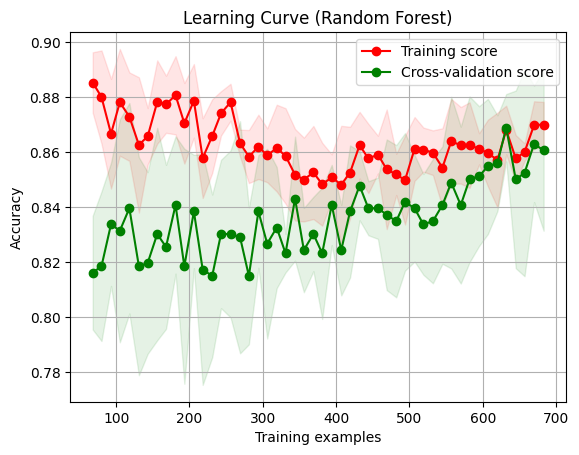

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

model = RandomForestClassifier(**best_params_RF)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]
plt.show()

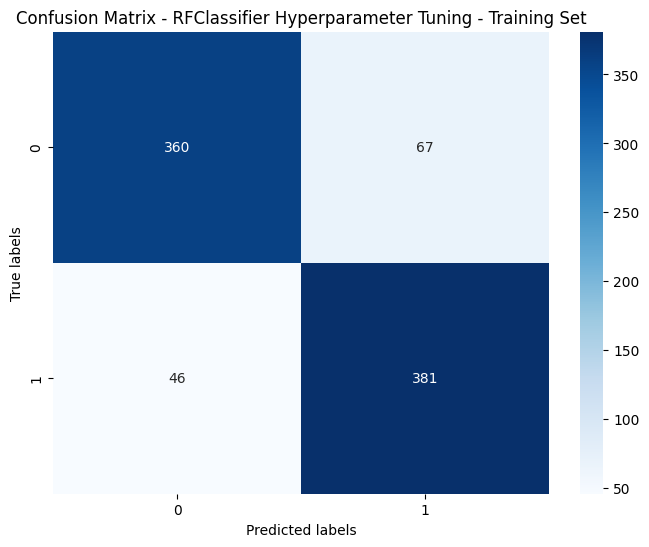

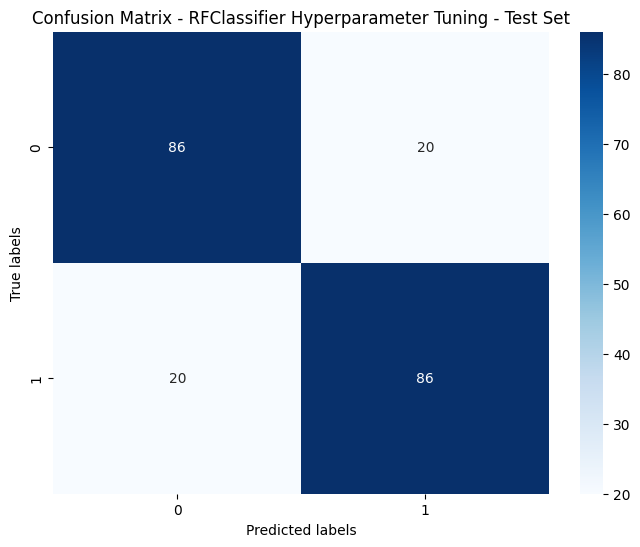

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RFClassifier Hyperparameter Tuning - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RFClassifier Hyperparameter Tuning - Test Set')
plt.show()

In [ ]:
# Define a threshold for classifying instances
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Train
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
train_precision = precision_score(y_train, y_pred_train_binary, zero_division=0)
train_recall = recall_score(y_train, y_pred_train_binary)
train_f1 = f1_score(y_train, y_pred_train_binary)
# Test
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_precision = precision_score(y_test, y_pred_test_binary, zero_division=0)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)

# Print all metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.9941451990632318
Test Accuracy: 0.8066037735849056

Train Precision: 0.9884259259259259
Test Precision: 0.751937984496124

Train Recall: 1.0
Test Recall: 0.9150943396226415

Train F1 Score: 0.9941792782305006
Test F1 Score: 0.8255319148936171


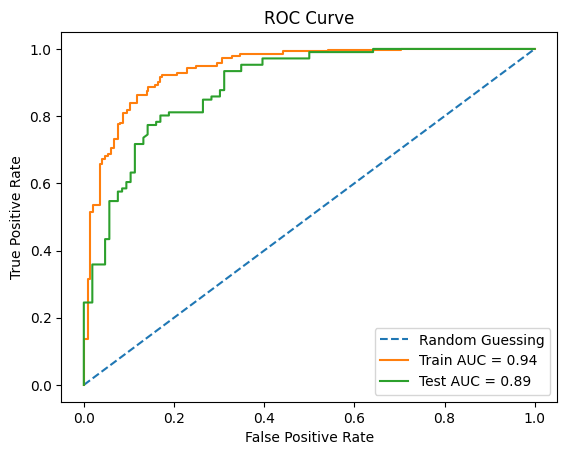

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

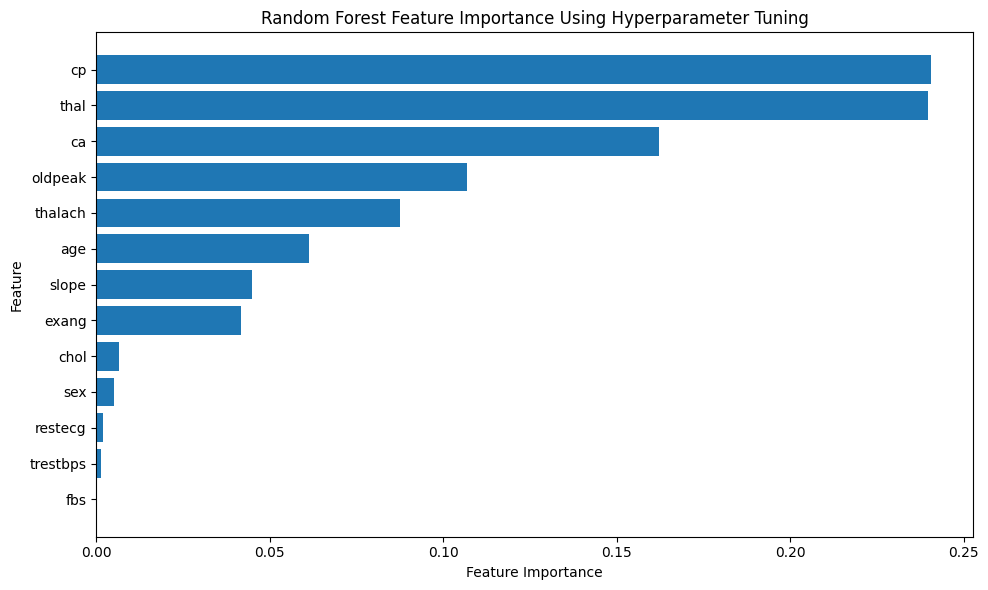

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance Using Hyperparameter Tuning")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

Menggunakan XGBoostClassifier

Cross Validation Score [0.98245614 0.96491228 1.         0.98830409 0.98235294]
Cross Validation Score Mean Accurary 0.9836050911592708


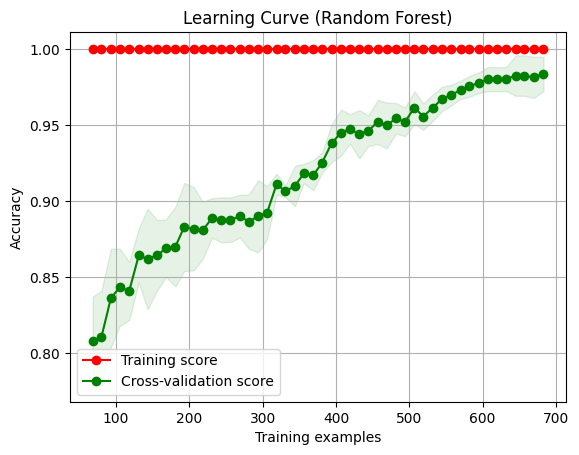

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

# Create an XGBoost classifier with random_state parameters and set it to 42
model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]
plt.show()

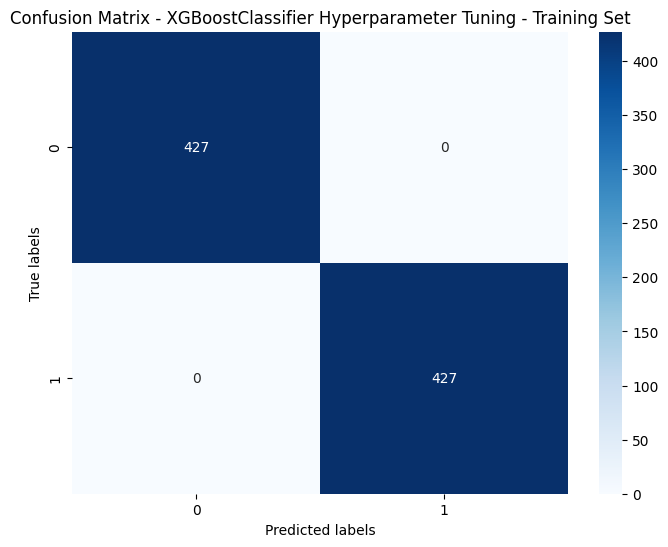

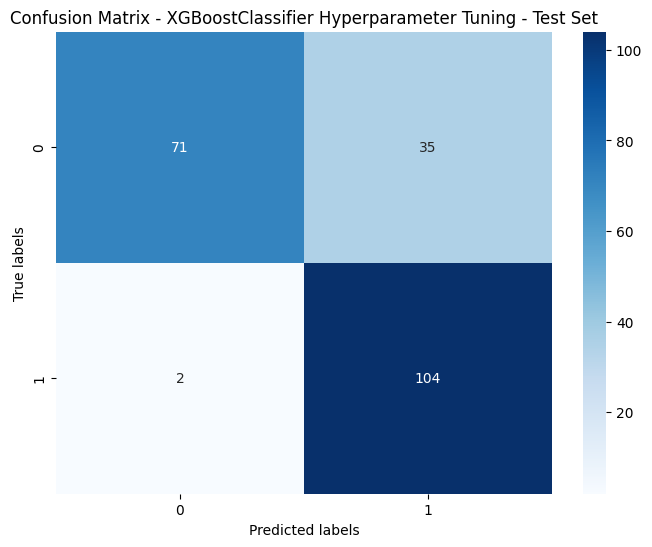

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Test Set')
plt.show()

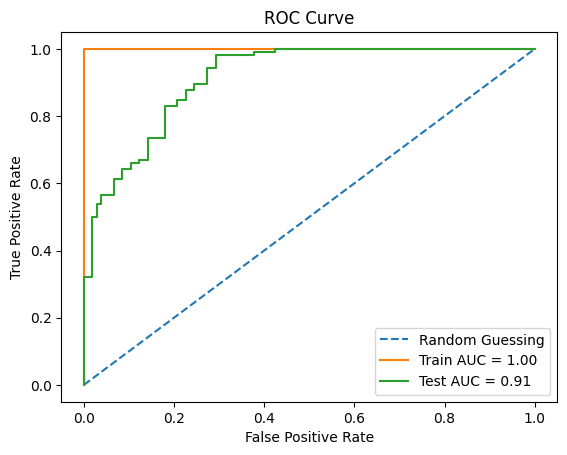

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

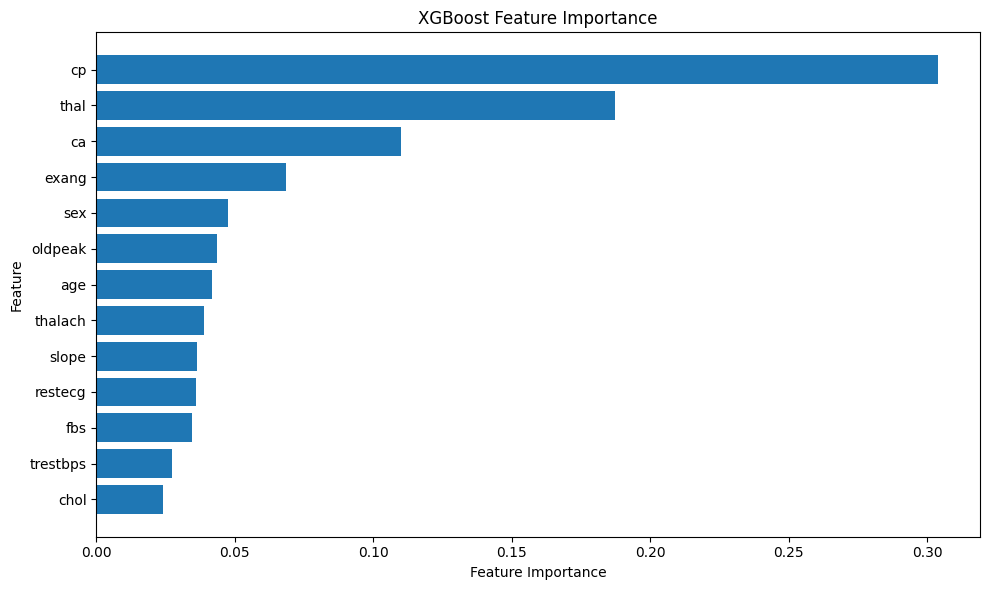

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

In [ ]:
# Define the parameter grid for randomized search
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds
    'max_depth': np.arange(3, 10),  # Maximum depth of a tree
    'learning_rate': np.arange(0.01, 0.3, 0.01),  # Learning rate
    'subsample': np.arange(0.6, 1.1, 0.1),  # Subsample ratio of the training instances
    'colsample_bytree': np.arange(0.6, 1.1, 0.1),  # Subsample ratio of columns when constructing each tree
    'gamma': np.arange(0, 0.3, 0.1),  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0, 0.6, 0.1),  # L1 regularization term on weights
    'reg_lambda': np.arange(0, 0.6, 0.1),  # L2 regularization term on weights
    'min_child_weight': np.arange(1, 10),  # Minimum sum of instance weight (hessian) needed in a child
    'scale_pos_weight': [1, 2, 5],  # Control the balance of positive and negative weights, useful for unbalanced classes
    'nthread': [4],  # Number of parallel threads used to run XGBoost
    'objective': ['binary:logistic'],  # Specify the learning task and the corresponding objective function
    'eval_metric': ['logloss'],  # Evaluation metric to be used for validation data
    'seed': [42]  # Random seed
}

# Create an XGBoost classifier
model = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=kfold, random_state=42)
# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_XGB = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_XGB)

# Get the best estimator
best_model = random_search.best_estimator_

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

Best Hyperparameters: {'subsample': 0.7999999999999999, 'seed': 42, 'scale_pos_weight': 5, 'reg_lambda': 0.30000000000000004, 'reg_alpha': 0.30000000000000004, 'objective': 'binary:logistic', 'nthread': 4, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.09, 'gamma': 0.0, 'eval_metric': 'logloss', 'colsample_bytree': 0.8999999999999999}


Melakukan train dan validation dengan best hyperparameter yang telah didapatkan pada XGBoostClassifier

Cross Validation Score [0.98245614 0.96491228 1.         0.98830409 0.98823529]
Cross Validation Score Mean Accurary 0.984781561747506


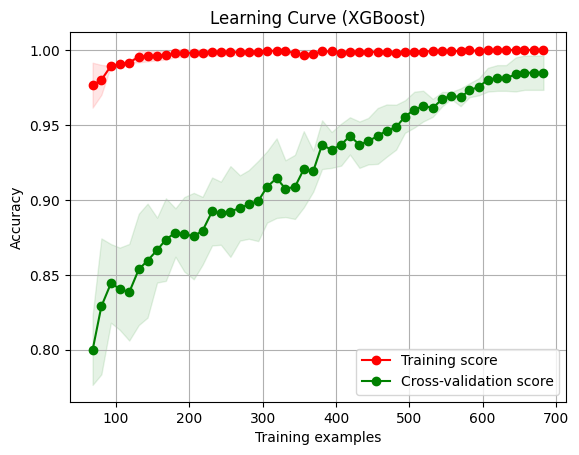

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

model = XGBClassifier(**best_params_XGB)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (XGBoost)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]
plt.show()

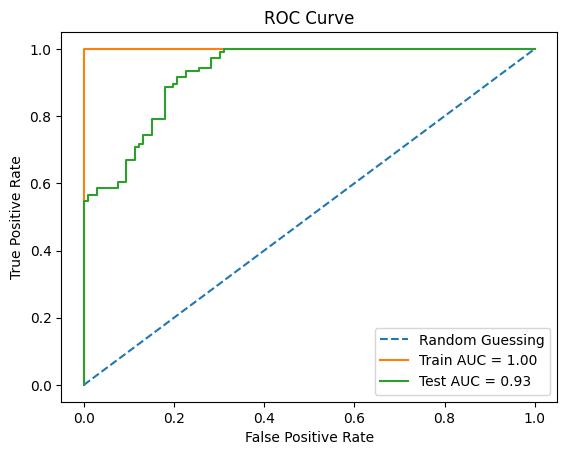

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

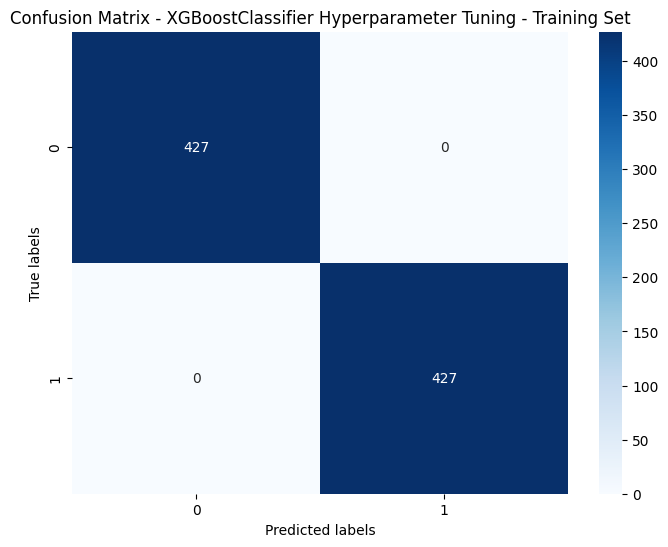

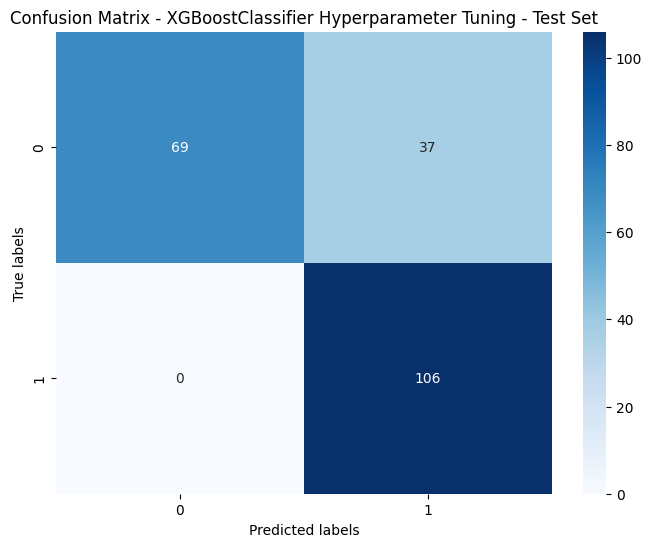

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Test Set')
plt.show()

In [ ]:
# Define a threshold for classifying instances
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Train
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
train_precision = precision_score(y_train, y_pred_train_binary, zero_division=0)
train_recall = recall_score(y_train, y_pred_train_binary)
train_f1 = f1_score(y_train, y_pred_train_binary)
# Test
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_precision = precision_score(y_test, y_pred_test_binary, zero_division=0)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)

# Print all metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 1.0
Test Accuracy: 0.8254716981132075

Train Precision: 1.0
Test Precision: 0.7412587412587412

Train Recall: 1.0
Test Recall: 1.0

Train F1 Score: 1.0
Test F1 Score: 0.8514056224899599


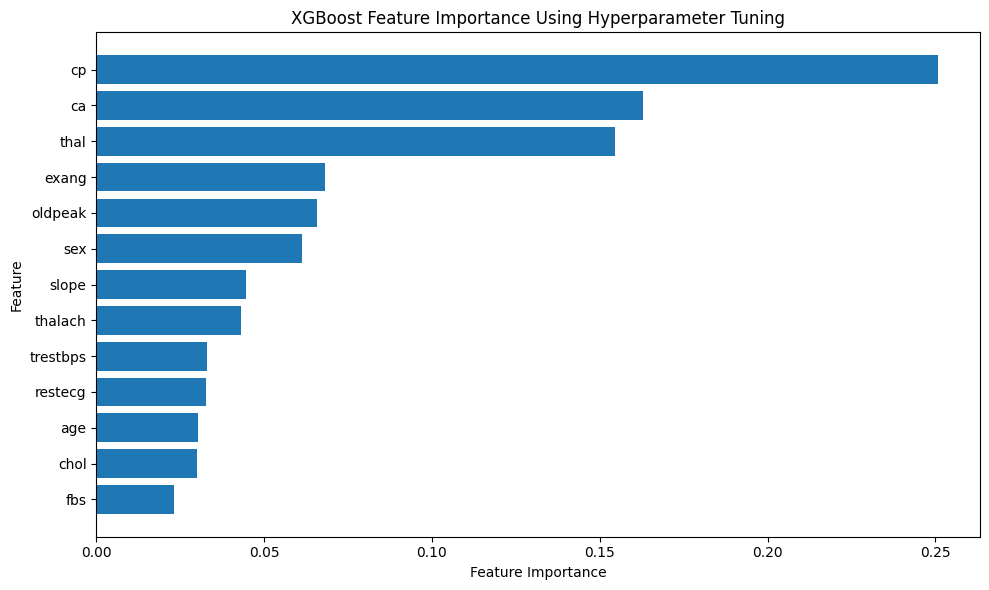

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance Using Hyperparameter Tuning")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

#Tahap 2 (Menggunakan feature important yang didapatkan pada kedua metode yang menggunakan hyperparameter tuning, dimana Feature Importantnya sama dengan dan diatas 0.05 dengan menggunakan best hyperparameter yang sama)

Menghapus feature < 0.05 dan membuat dataframe baru berdasarkan dengan kedua metode yang digunakan

In [ ]:
new_train_RF = train_balanced.drop(['slope','thalach','trestbps','restecg','age','chol','fbs'],axis=1)
new_train_XGB = train_balanced.drop(['age','slope','sex','chol','restecg','trestbps','fbs'],axis=1)
new_test_RF = test_balanced.drop(['slope','thalach','trestbps','restecg','age','chol','fbs'],axis=1)
new_test_XGB = test_balanced.drop(['age','slope','sex','chol','restecg','trestbps','fbs'],axis=1)

In [ ]:
new_train_RF.head()

,sex,cp,exang,oldpeak,ca,thal,target
0,1,0,0,1.0,2,3,0
1,1,0,1,3.1,0,3,0
2,1,0,1,2.6,0,3,0
3,1,0,0,0.0,1,3,0
4,0,0,0,1.9,3,2,0


In [ ]:
# Separate features and target variable of Train Balanced Set
X_train = new_train_RF.drop('target', axis=1)
y_train = new_train_RF['target']

# Separate features and target variable of Test Balanced Set
X_test = new_test_RF.drop('target', axis=1)
y_test = new_test_RF['target']

# Identify numeric features
numeric_cols = X_train.select_dtypes(exclude='object').columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale only the numeric features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_cols]), columns=numeric_cols)

# Combine scaled features with non-numeric features (if any)
train_scaled = pd.concat([X_train_scaled, X_train.drop(numeric_cols, axis=1)], axis=1)
test_scaled = pd.concat([X_test_scaled, X_test.drop(numeric_cols, axis=1)], axis=1)

# Combine scaled features with the target variable
train_scaled = pd.concat([train_scaled, y_train], axis=1)
test_scaled = pd.concat([test_scaled, y_test], axis=1)

# Print scaled train dataset description
display(train_scaled.describe())
print("")
# Print scaled test dataset description
display(test_scaled.describe())
train_scaled.shape

,sex,cp,exang,oldpeak,ca,thal,target
count,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,854.000000
mean,4.160086e-17,-9.984207e-17,-4.368091e-17,-1.081622e-16,5.616116e-17,9.568198e-17,0.500000
std,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,0.500293
min,-1.474694e+00,-9.256780e-01,-7.189394e-01,-9.205341e-01,-7.443797e-01,-3.689393e+00,0.000000
25%,-1.474694e+00,-9.256780e-01,-7.189394e-01,-9.205341e-01,-7.443797e-01,-5.003833e-01,0.000000
50%,6.781070e-01,6.248326e-02,-7.189394e-01,-2.490580e-01,-7.443797e-01,-5.003833e-01,0.500000
75%,6.781070e-01,1.050644e+00,1.390938e+00,5.902870e-01,2.130002e-01,1.094122e+00,1.000000
max,6.781070e-01,2.038806e+00,1.390938e+00,4.283405e+00,3.085140e+00,1.094122e+00,1.000000


,sex,cp,exang,oldpeak,ca,thal,target
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,-3.351617e-17,2.094760e-17,1.256856e-16,-8.379042e-17,1.675808e-17,2.220446e-16,0.500000
std,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,0.501183
min,-1.689540e+00,-7.983335e-01,-6.871843e-01,-9.554531e-01,-7.247939e-01,-3.981034e+00,0.000000
25%,-1.689540e+00,-7.983335e-01,-6.871843e-01,-9.554531e-01,-7.247939e-01,-6.517275e-01,0.000000
50%,5.918771e-01,-7.983335e-01,-6.871843e-01,-2.502166e-01,-7.247939e-01,-6.517275e-01,0.500000
75%,5.918771e-01,1.071796e+00,1.455214e+00,6.313290e-01,3.134244e-01,1.012926e+00,1.000000
max,5.918771e-01,2.006860e+00,1.455214e+00,3.981202e+00,3.428079e+00,1.012926e+00,1.000000


(854, 7)

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90building tree 13 of 90

building tree 14 of 90building tree 15 of 90

building tree 16 of 90building tree 17 of 90

building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90building tree 22 of 90

building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90building tree 36 of 90

building tree 37 of 90building tree 38 of 90

building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:

building tree 45 of 90building tree 46 of 90

building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90building tree 52 of 90

building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90building tree 62 of 90

building tree 63 of 90building tree 64 of 90

building tree 65 of 90
building tree 66 of 90
building tree 67 of 90building tree 68 of 90
building tree 69 of 90

building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90building tree 74 of 90

building tree 75 of 90building tree 76 of 90

building tree 77 of 90building tree 78 of 90
building tree 79 of 90

building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tr

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 co



building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90building tree 80 of 90

building tree 81 of 90building tree 82 of 90

building tree 83 of 90
building tree 84 of 90building tree 85 of 90

building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90building tree 2 of 90

building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90building tree 8 of 90

building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90building tree 13 of 90

building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 o

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90building tree 36 of 90

building tree 37 of 90
building tree 38 of 90
building tree 39 of 90building tree 40 of 90

building tree 41 of 90building tree 42 of 90

building tree 43 of 90building tree 44 of 90

building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90building tree 53 of 90

building tree 54 of 90
building tree 55 of 90
building tree 56 of 90building tree 57 of 90

building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90building tree 65 of 90

building tree 66 of 90
building tree 67 of 90
building tr

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90building tree 2 of 90

building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90building tree 7 of 90

building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90building tree 13 of 90
building tree 14 of 90

building tree 15 of 90building tree 16 of 90

building tree 17 of 90
building tree 18 of 90
building tree 19 of 90building tree 20 of 90

building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90building tree 25 of 90

building tree 26 of 90
building tree 27 of 90building tree 28 of 90

building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90building tree 34 of 90

building tree 35 of 90building tree 36 of 90

building tree 37 of 90building tree 38 of 90

building tree 39 of 90
building tree 40 of 90building tree 41 of 90

building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90building tree 22 of 90

building tree 23 of 90
building tree 24 of 90building tree 25 of 90

building tree 26 of 90
building tree 27 of 90building tree 28 of 90

building tree 29 of 90
building tree 30 of 90building tree 31 of 90

building tree 32 of 90building tree 33 of 90

building tree 34 of 90
building tree 35 of 90
building tree 36 of 90building tree 37 of 90

building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90building tree 8 of 90

building tree 9 of 90building tree 10 of 90

building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90building tree 20 of 90

building tree 21 of 90building tree 22 of 90

building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90building tree 32 of 90

building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90building tree 41 of 90

building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.0s finished


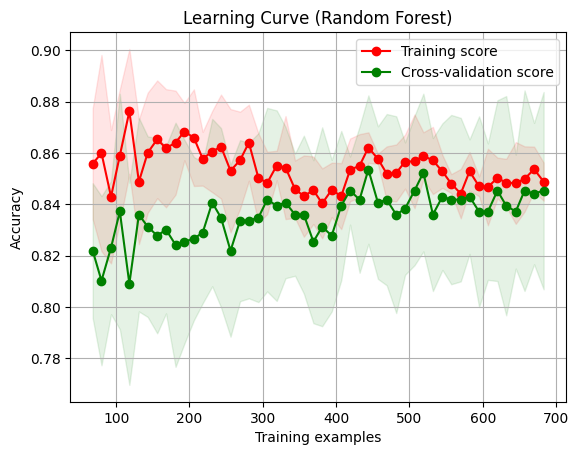

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

model = RandomForestClassifier(**best_params_RF)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (Random Forest)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]

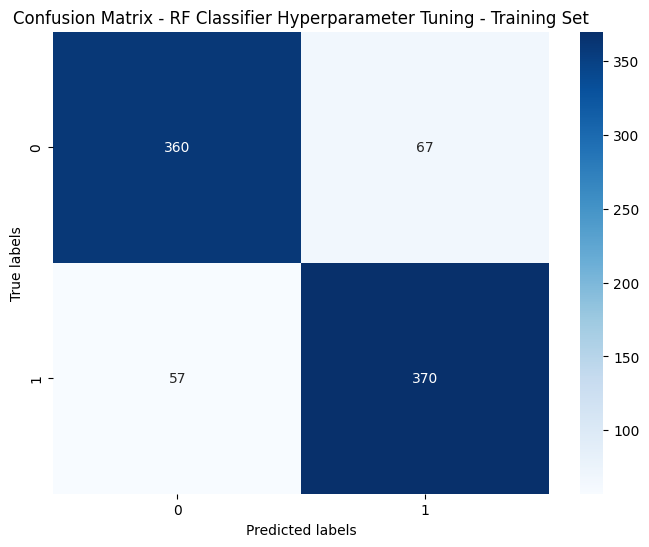

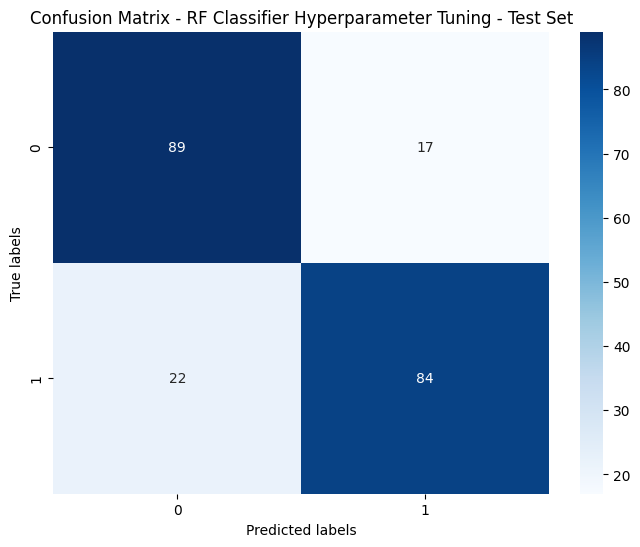

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RF Classifier Hyperparameter Tuning - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RF Classifier Hyperparameter Tuning - Test Set')
plt.show()

In [ ]:
# Define a threshold for classifying instances
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Train
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
train_precision = precision_score(y_train, y_pred_train_binary, zero_division=0)
train_recall = recall_score(y_train, y_pred_train_binary)
train_f1 = f1_score(y_train, y_pred_train_binary)
# Test
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_precision = precision_score(y_test, y_pred_test_binary, zero_division=0)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)

# Print all metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.8548009367681498
Test Accuracy: 0.8160377358490566

Train Precision: 0.8466819221967964
Test Precision: 0.8316831683168316

Train Recall: 0.8665105386416861
Test Recall: 0.7924528301886793

Train F1 Score: 0.8564814814814815
Test F1 Score: 0.8115942028985508


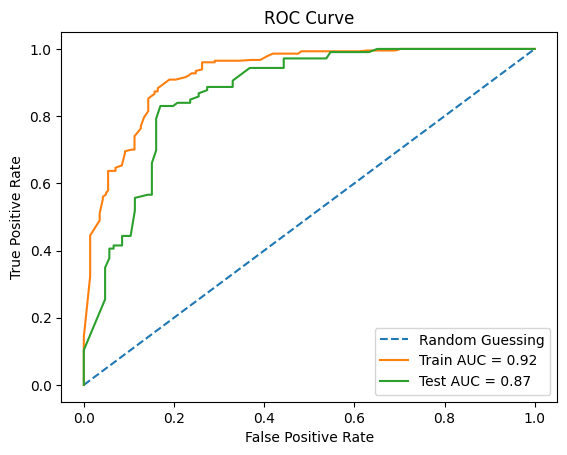

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

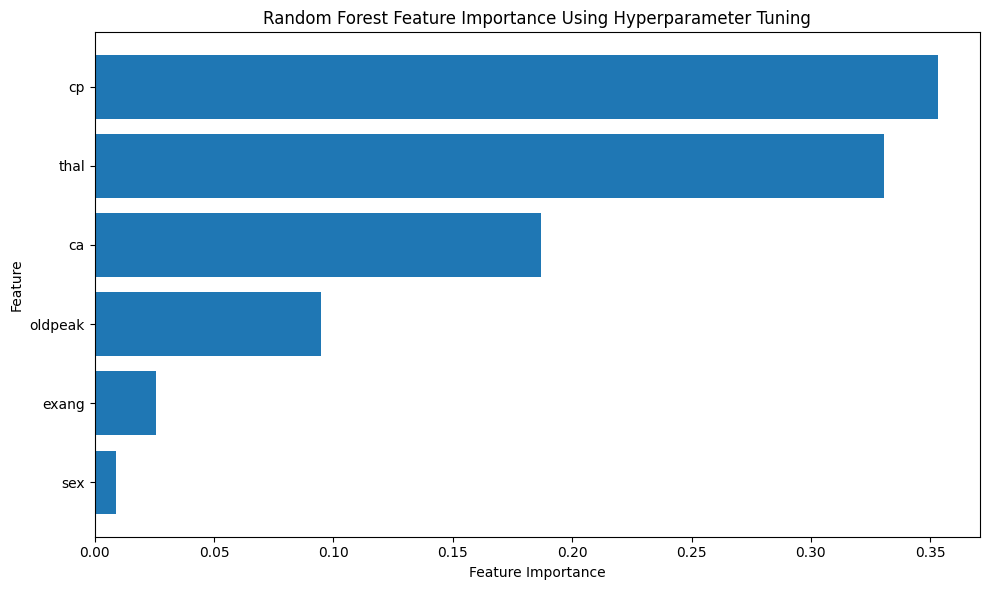

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance Using Hyperparameter Tuning")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

Menggunakan XGBoostClassifier

In [ ]:
# Separate features and target variable of Train Balanced Set
X_train = new_train_XGB.drop('target', axis=1)
y_train = new_train_XGB['target']

# Separate features and target variable of Test Balanced Set
X_test = new_test_XGB.drop('target', axis=1)
y_test = new_test_XGB['target']

# Identify numeric features
numeric_cols = X_train.select_dtypes(exclude='object').columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale only the numeric features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_cols]), columns=numeric_cols)

# Combine scaled features with non-numeric features (if any)
train_scaled = pd.concat([X_train_scaled, X_train.drop(numeric_cols, axis=1)], axis=1)
test_scaled = pd.concat([X_test_scaled, X_test.drop(numeric_cols, axis=1)], axis=1)

# Combine scaled features with the target variable
train_scaled = pd.concat([train_scaled, y_train], axis=1)
test_scaled = pd.concat([test_scaled, y_test], axis=1)

# Print scaled train dataset description
display(train_scaled.describe())
print("")
# Print scaled test dataset description
display(test_scaled.describe())
train_scaled.shape

,cp,thalach,exang,oldpeak,ca,thal,target
count,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,8.540000e+02,854.000000
mean,-9.984207e-17,-5.075305e-16,-4.368091e-17,-1.081622e-16,5.616116e-17,9.568198e-17,0.500000
std,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,1.000586e+00,0.500293
min,-9.256780e-01,-3.351022e+00,-7.189394e-01,-9.205341e-01,-7.443797e-01,-3.689393e+00,0.000000
25%,-9.256780e-01,-7.151956e-01,-7.189394e-01,-9.205341e-01,-7.443797e-01,-5.003833e-01,0.000000
50%,6.248326e-02,1.490096e-01,-7.189394e-01,-2.490580e-01,-7.443797e-01,-5.003833e-01,0.500000
75%,1.050644e+00,7.107431e-01,1.390938e+00,5.902870e-01,2.130002e-01,1.094122e+00,1.000000
max,2.038806e+00,2.309523e+00,1.390938e+00,4.283405e+00,3.085140e+00,1.094122e+00,1.000000


,cp,thalach,exang,oldpeak,ca,thal,target
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,2.094760e-17,-6.284281e-17,1.256856e-16,-8.379042e-17,1.675808e-17,2.220446e-16,0.500000
std,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,0.501183
min,-7.983335e-01,-2.375890e+00,-6.871843e-01,-9.554531e-01,-7.247939e-01,-3.981034e+00,0.000000
25%,-7.983335e-01,-8.175283e-01,-6.871843e-01,-9.554531e-01,-7.247939e-01,-6.517275e-01,0.000000
50%,-7.983335e-01,2.177471e-01,-6.871843e-01,-2.502166e-01,-7.247939e-01,-6.517275e-01,0.500000
75%,1.071796e+00,8.062194e-01,1.455214e+00,6.313290e-01,3.134244e-01,1.012926e+00,1.000000
max,2.006860e+00,1.939574e+00,1.455214e+00,3.981202e+00,3.428079e+00,1.012926e+00,1.000000


(854, 7)

Cross Validation Score [0.95321637 0.93567251 0.98830409 0.97076023 0.97058824]
Cross Validation Score Mean Accurary 0.9637082903336773


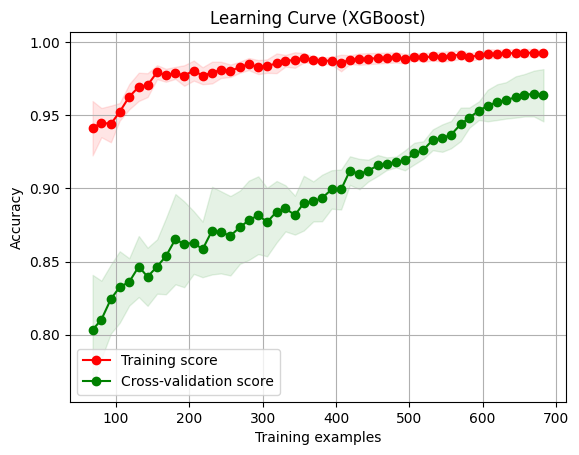

In [ ]:
# Define the learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Separate features and target variable of Scaled Train Set
X_train = train_scaled.drop(['target'], axis=1)
y_train = train_scaled['target']

X_test = test_scaled.drop(['target'], axis=1)
y_test = test_scaled['target']

# Create an XGBoost classifier with random_state parameters and set it to 42
model = XGBClassifier(**best_params_XGB)
model.fit(X_train,y_train)
# Train the model
kfold = KFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_val_score(model,X_train, y_train, cv=kfold)

print(f"Cross Validation Score {scores}")
print(f"Cross Validation Score Mean Accurary {scores.mean()}")

# Plot learning curve
title = "Learning Curve (XGBoost)"
plot_learning_curve(model, title, X_train, y_train, cv=kfold, n_jobs=-1)

# Make predictions (predicted target variable) on training and testing sets
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict_proba(X_test)[:, 1]
plt.show()

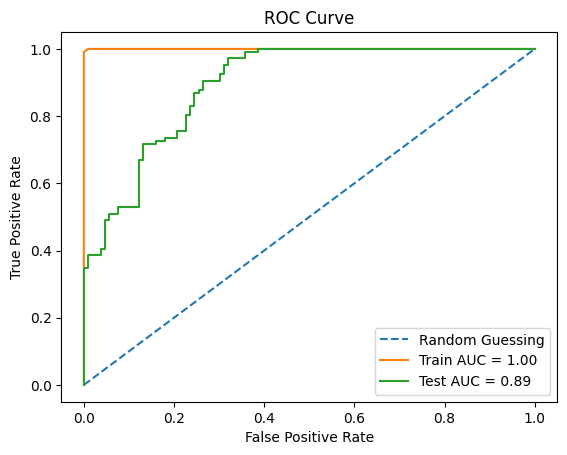

In [ ]:
# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate ROC curve for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

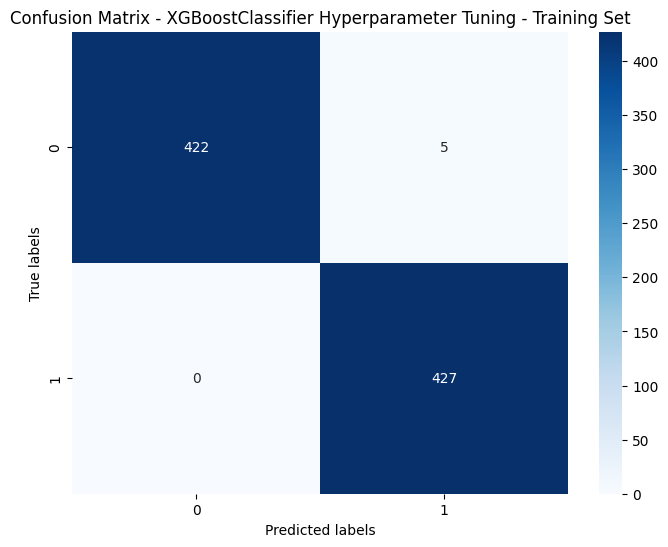

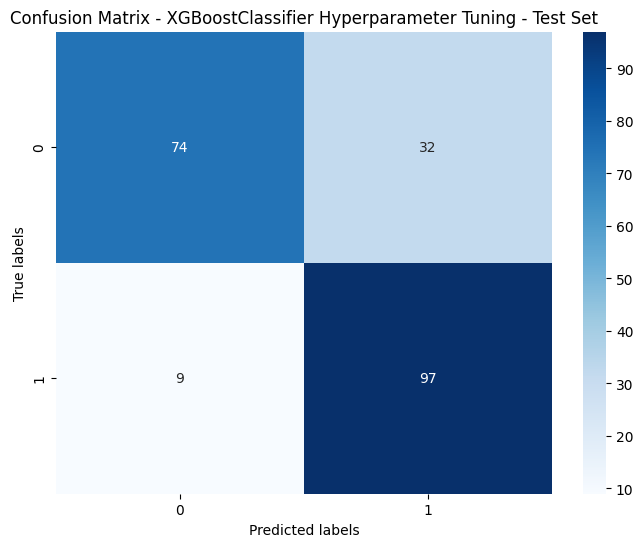

In [ ]:
# Set threshold for binary classification
threshold = 0.5  # You can adjust this threshold as needed

# Convert probabilities to binary predictions
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_binary)
cm_test = confusion_matrix(y_test, y_pred_test_binary)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Training Set')
plt.show()
print("")
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoostClassifier Hyperparameter Tuning - Test Set')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define a threshold for classifying instances
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred_train_binary = (y_pred_train >= threshold).astype(int)
y_pred_test_binary = (y_pred_test >= threshold).astype(int)

# Train
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
train_precision = precision_score(y_train, y_pred_train_binary, zero_division=0)
train_recall = recall_score(y_train, y_pred_train_binary)
train_f1 = f1_score(y_train, y_pred_train_binary)
# Test
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_precision = precision_score(y_test, y_pred_test_binary, zero_division=0)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)

# Print all metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.9941451990632318
Test Accuracy: 0.8066037735849056

Train Precision: 0.9884259259259259
Test Precision: 0.751937984496124

Train Recall: 1.0
Test Recall: 0.9150943396226415

Train F1 Score: 0.9941792782305006
Test F1 Score: 0.8255319148936171


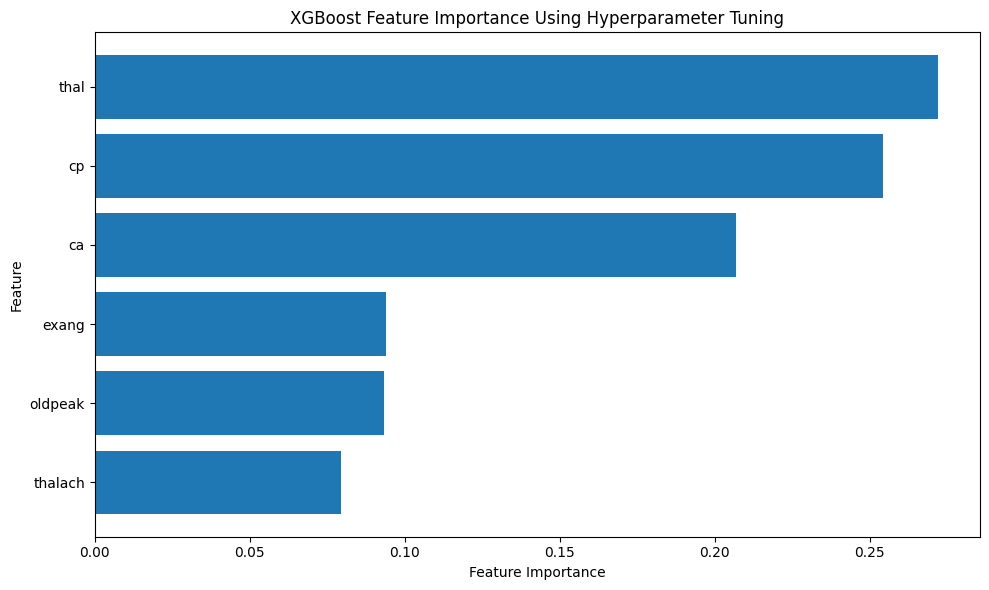

In [ ]:
# Feature importance visualization
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance Using Hyperparameter Tuning")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

#Kesimpulan

Terdapat 4 hasil/model pada analisis di tahap 1, pertama menggunakan Random Forest Classifier (RFC) dengan hasil Cross Validation Score Mean Accurary = 0.9836050911592708, Train AUC = 1.0, Test AUC = 1.0, kedua dengan RFC tapi menggunakan best hyperparameter yang dicari dengan RandomSearch yang memiliki hasil Cross Validation Score Mean Accurary = 0.8535810113519091, Train AUC = 0.94, Test AUC = 0.89. Selanjutnya ketiga menggunakan XGBoost Classifier (XGB) dengan hasil Cross Validation Score Mean Accurary = 0.9836050911592708, Train AUC = 1.0, Test AUC = 0.91, dan keempat dengan XGBoost tapi menggunakan best hyperparameter yang dicari dengan XGB yang memiliki hasil Cross Validation Score Mean Accurary = 0.984781561747506, Train AUC = 1.0, Test AUC = 0.93

Terdapat 2 hasil/model pada analisis di tahap 2 dimana hanya menggunakan feature important >= 0.05 yang telah dicari dengan masing-masing metode sebelumnya, pertama dengan RFC tapi menggunakan best hyperparameter yang dicari dengan RandomSearch yang memiliki hasil Cross Validation Score Mean Accurary = 0.8477261781905746, Train AUC = 0.92, Test AUC = 0.87. Selanjutnya kedua dengan XGBoost tapi menggunakan best hyperparameter yang dicari dengan XGB yang memiliki hasil Cross Validation Score Mean Accurary = 0.9637082903336773, Train AUC = 1.0, Test AUC = 0.89

Dari 8 hasil yang telah dilakukan, dapat dilihat ditahap 1 menggunakan RFC mempunyai model yang dapat dikatakan sempurna, akan tetapi dapat dilihat bahwa model yang paling dapat dikatakan stabil adalah di tahap 1 (kedua) yaitu menggunakan RFC Best Hyperparameter dengan selisih 0.4 di antara Train dan Test AUC